## Library Imports

In [1]:
from scipy.signal import lfilter
from scipy.signal import butter
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal
import librosa.display
import numpy as np
import os

## Function for BandFilter

In [2]:
# Creating Butterworth Bandpass Filter
def butter_bandpass(lowcut : int, highcut : int, fs : int, order=5):
    """ Create a Butterworth Bandpass Filter

        \tlowcut: low cut frequency (in Hz)
        \thighcut: high cut frequency (in Hz)
        \tfs: sampling frequency (in Hz)
        \torder: order of the filter (default = 5)

        return: b, a: numerator (b) and denominator (a) polynomials of the IIR filter   """

    nyq = 0.5 * fs                                      # Nyquist frequency (half of the sampling frequency)
    low = lowcut / nyq                                  # Normalized low cut frequency
    high = highcut / nyq                                # Normalized high cut frequency
    b, a = butter(order, [low, high], btype='band')     # Create Butterworth bandpass filter
    return b, a                                         # Return numerator (b) and denominator (a) polynomials of the IIR filter


def butter_bandpass_filter(data, lowcut : int, highcut : int, fs : int, order=5):
    """     Apply a Butterworth Bandpass Filter   
            
            \tdata: signal to be filtered
            \tlowcut: low cut frequency (in Hz)
            \thighcut: high cut frequency (in Hz)
            \tfs: sampling frequency (in Hz)
            \torder: order of the filter (default = 5)

            return: y: filtered signal   """


    b, a = butter_bandpass(lowcut, highcut, fs, order=order)    # Create Butterworth bandpass filter
    y = lfilter(b, a, data)                                     # Apply filter
    return y                                                    # Return filtered signal

## Function for Finding Peak Landmarks (Start, End, and Peak)

In [3]:
def find_start_peak_end(x_filt,windowsize=100):
    """     Find the start, peak and end of the signal
            \tx_filt: filtered signal
            \twindowsize: size of the window to calculate the standard deviation (default = 100)
            return: start, peak, end: start, peak and end of the signal   """

    peak = np.argmax(np.abs(x_filt))    # Find the peak of the signal
    start=0                             # Initialize start 
    end = len(x_filt)                   # Initialize end

    std_cutoff = np.std(x_filt)/10      # Set the standard deviation cutoff

    # Find the start and end of the signal
    for i in range(peak,0,-windowsize):  

        # Calculate the standard deviation of the signal in the window
        std = np.std(x_filt[i:i+windowsize])

        # If the standard deviation is less than the cutoff, set the start of the signal
        if std <= std_cutoff:
            start = i
            break

    # Find the end of the signal
    for j in range(peak,len(x_filt),windowsize):

        # Calculate the standard deviation of the signal in the window
        std = np.std(x_filt[j:j+windowsize])

        # If the standard deviation is less than the cutoff, set the end of the signal
        if std <= std_cutoff:
            end = j
            break
    
    # Sanity check so that end doesn't go out of bounds
    if end==len(x_filt):
        end = len(x_filt)-3201
    
    # Adding 0.1s of margin to end 
    return start,peak,end+3200

## Visualizing Autoclipping for each breath

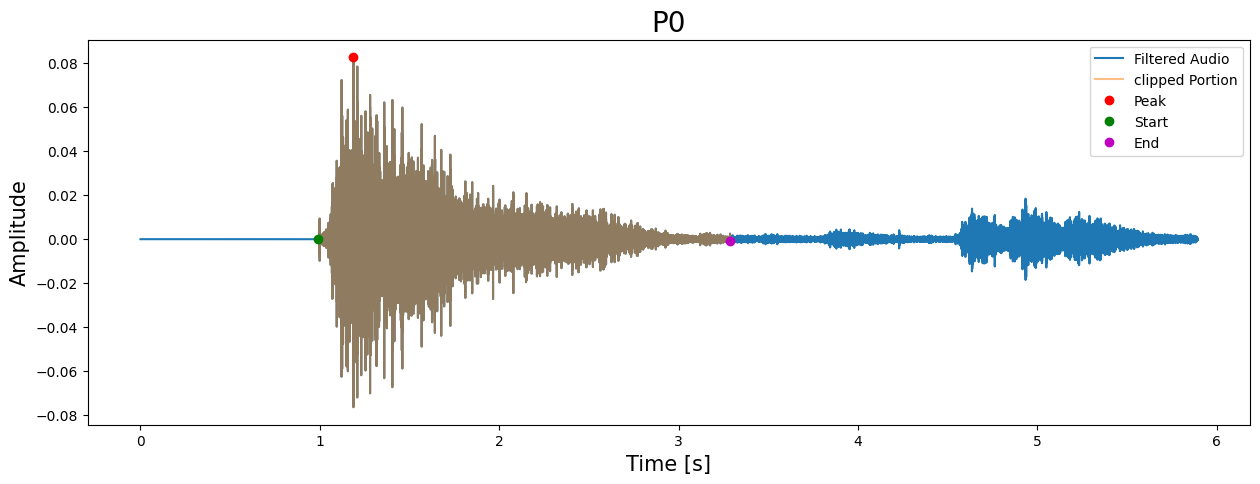

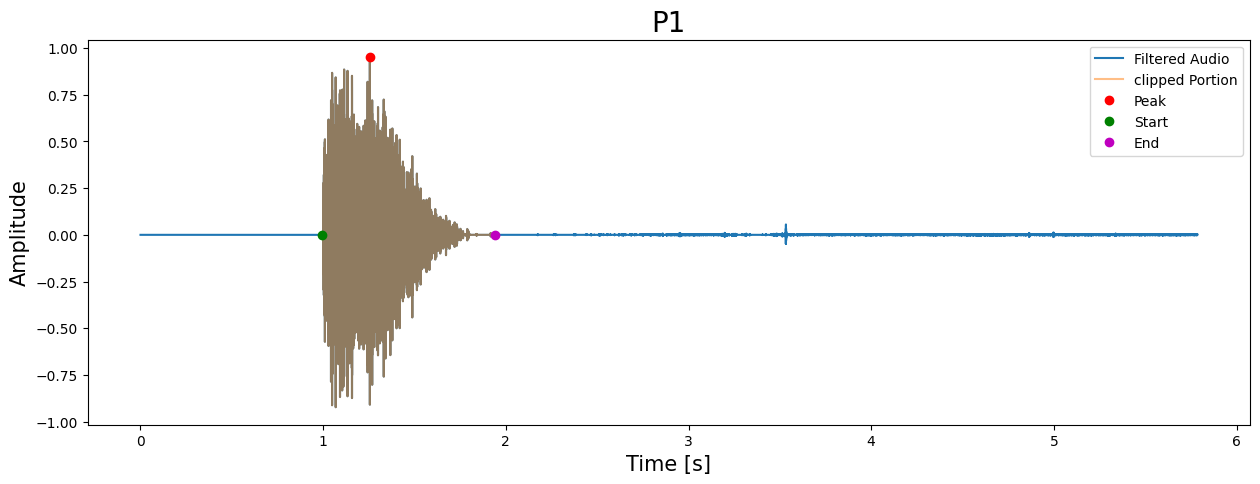

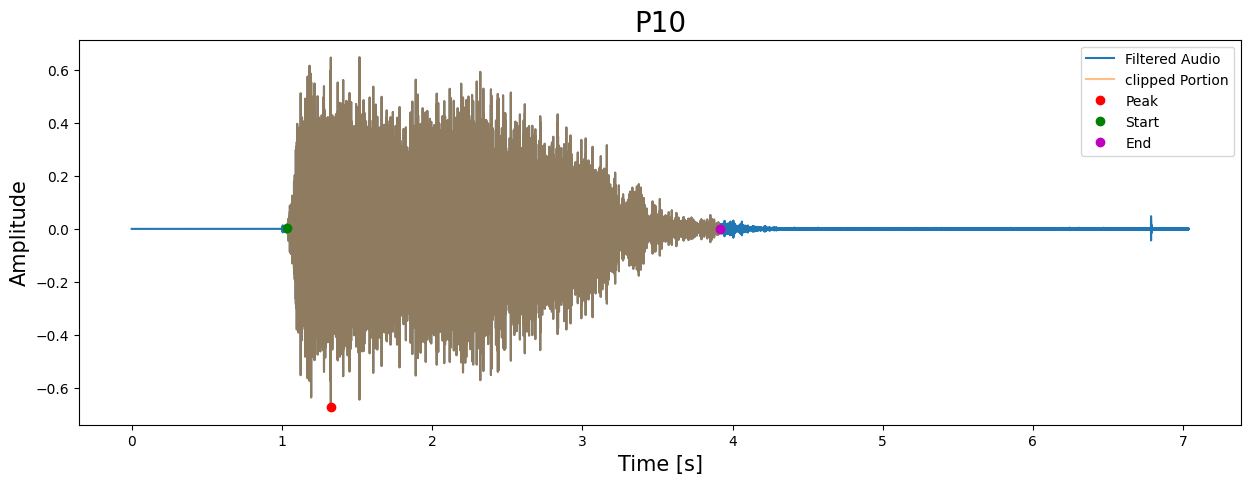

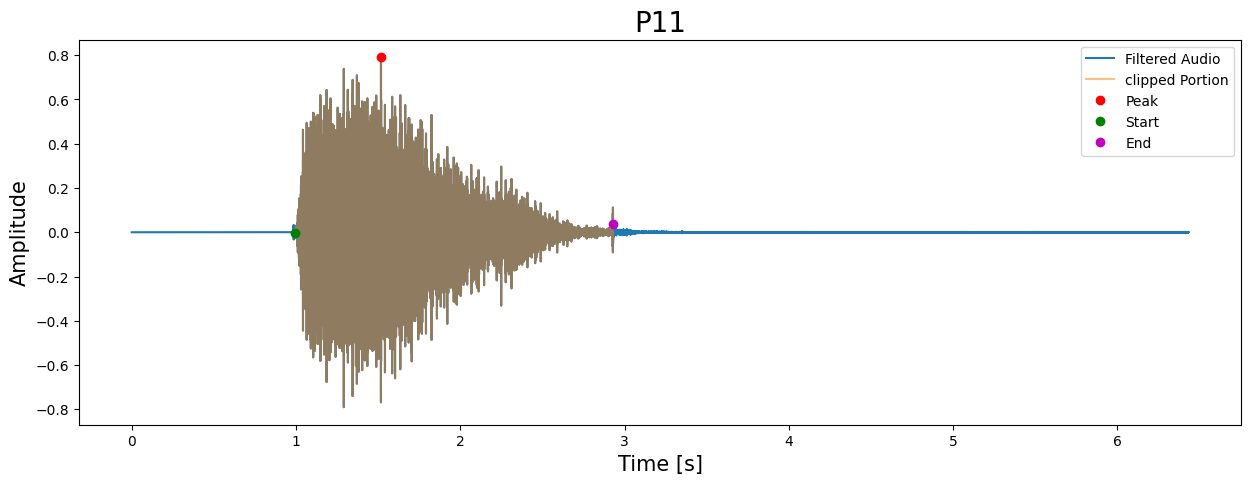

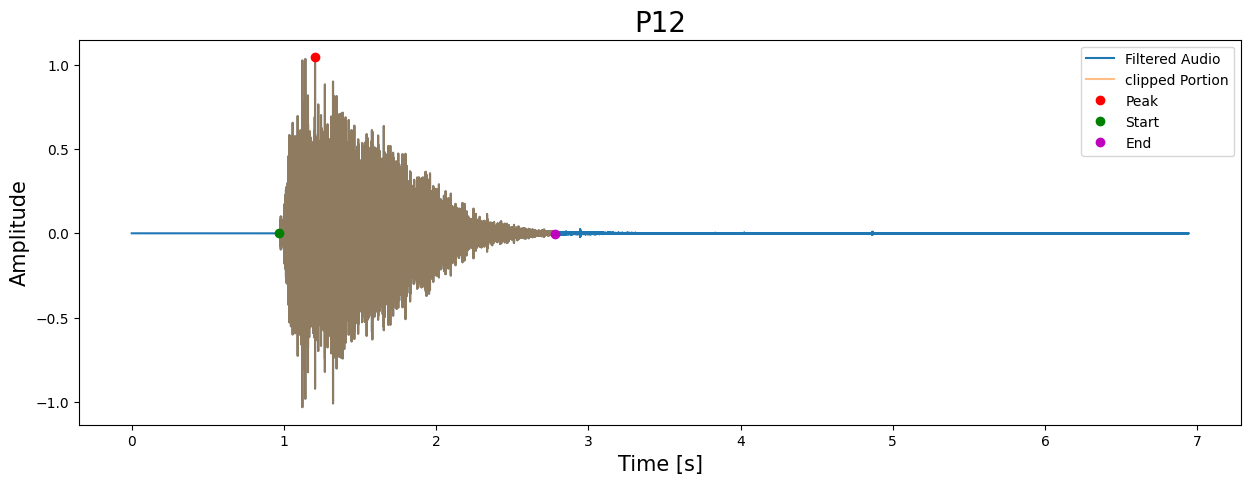

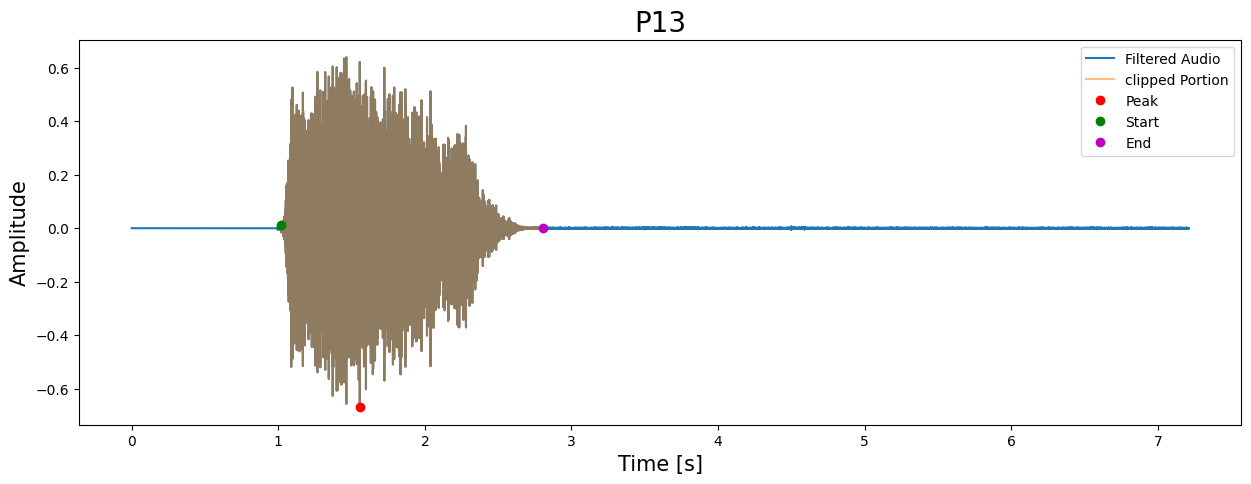

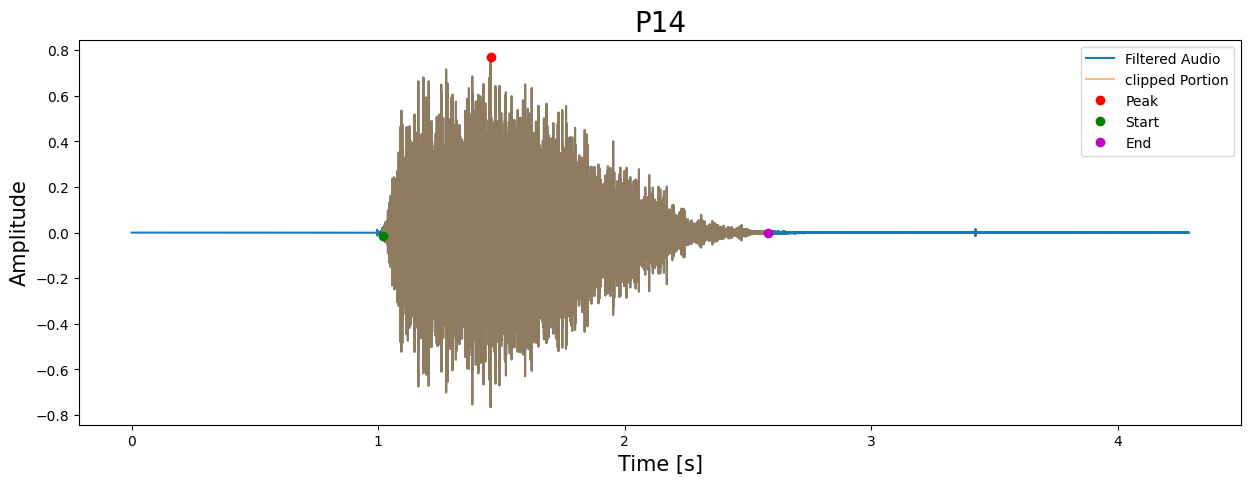

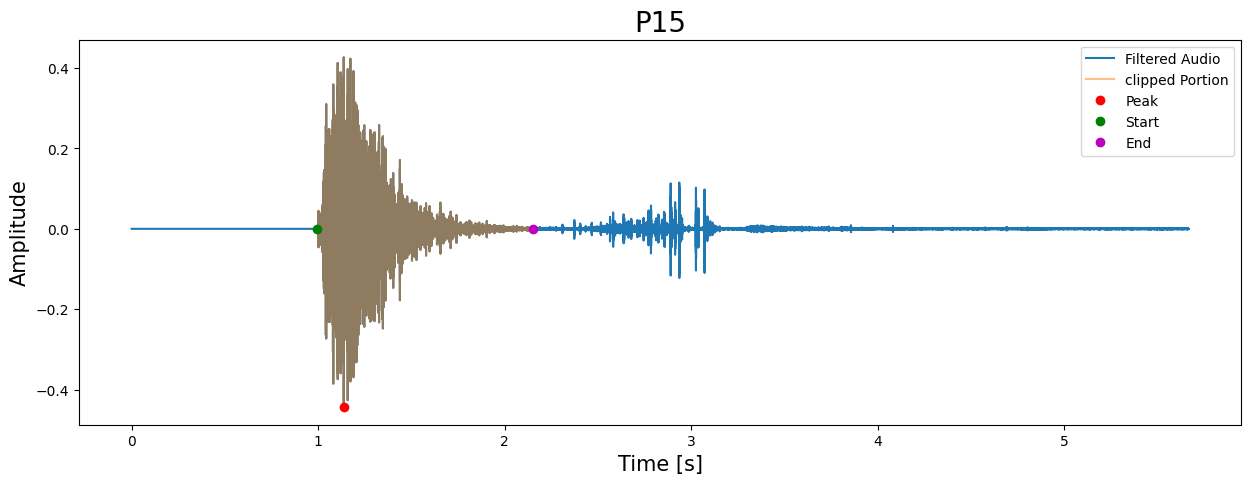

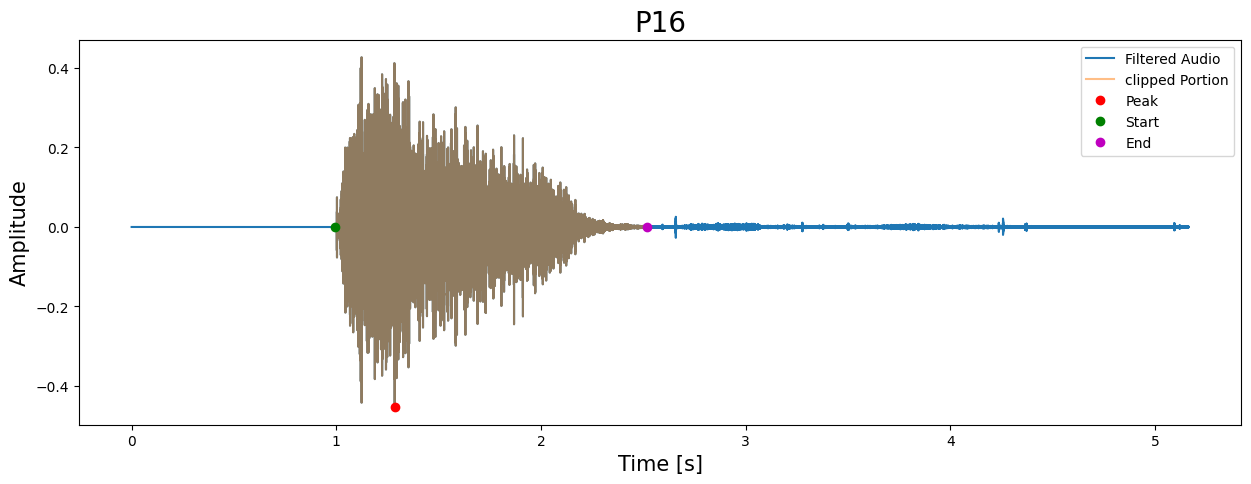

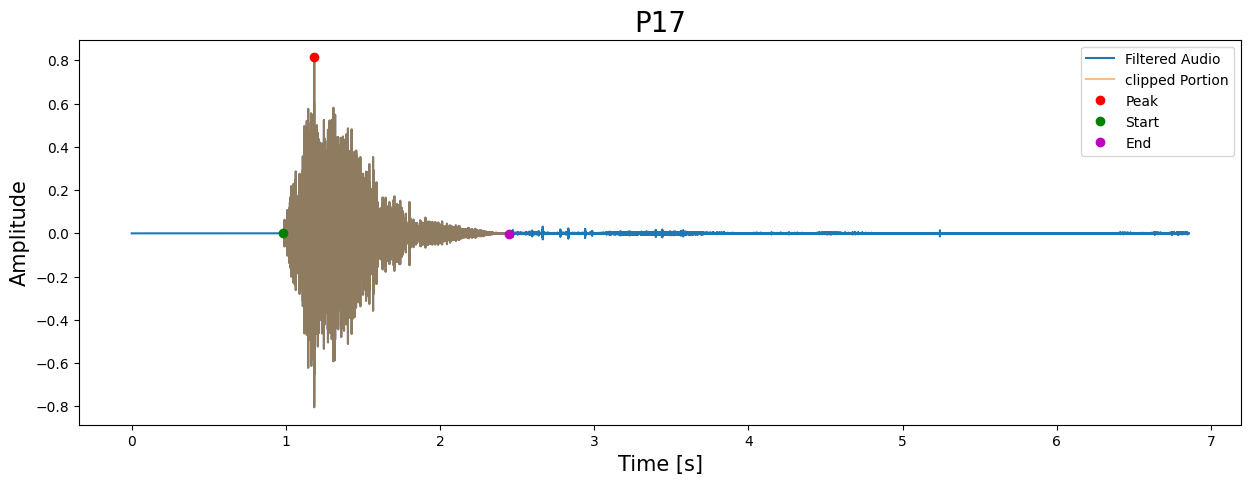

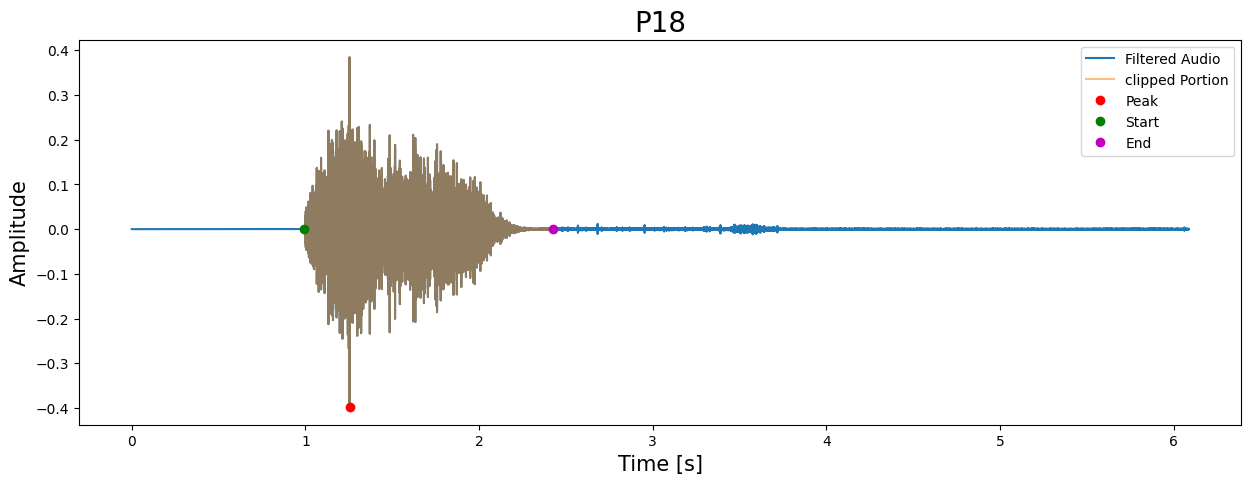

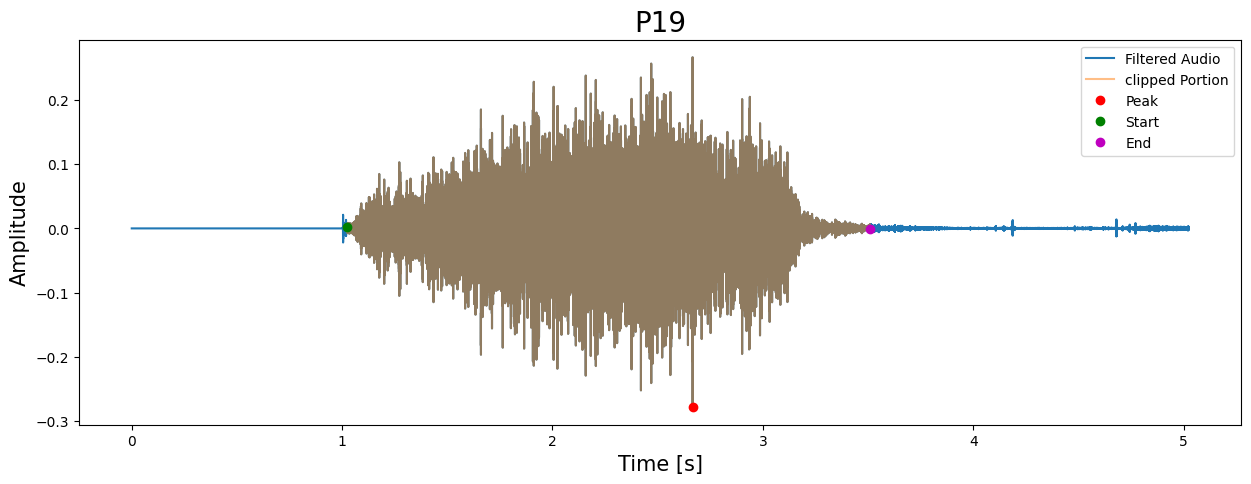

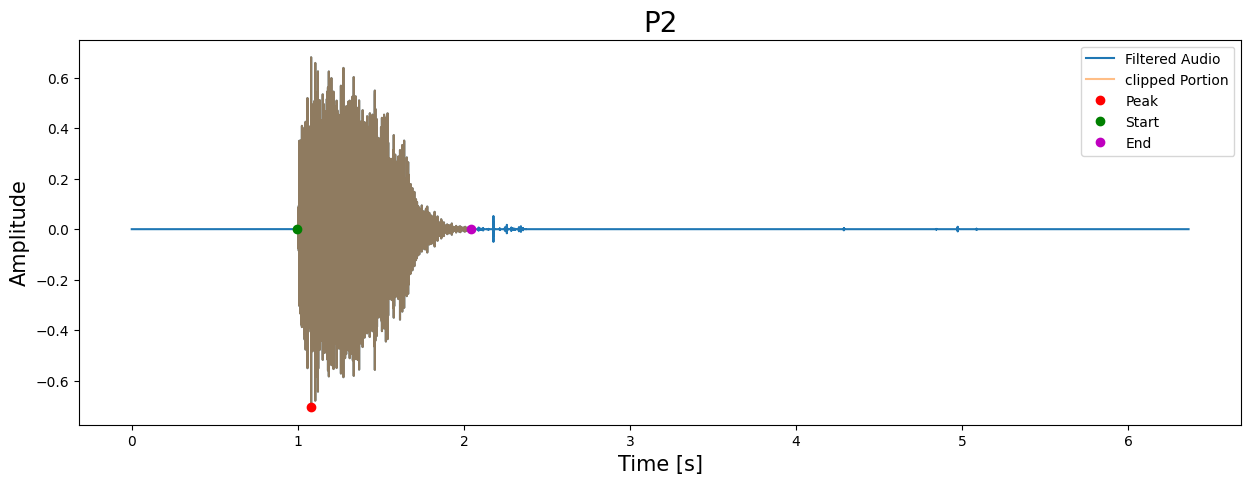

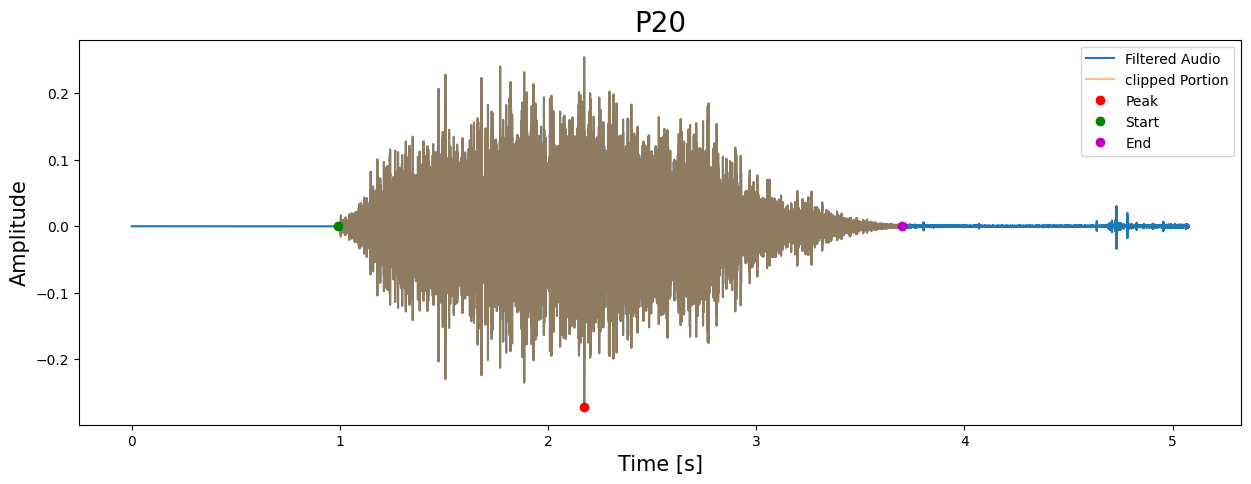

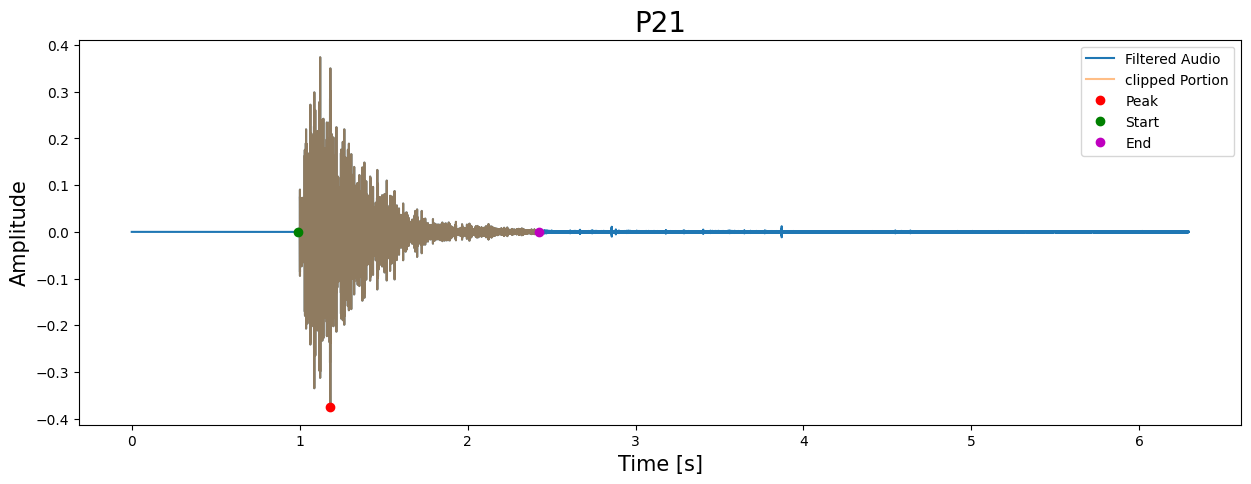

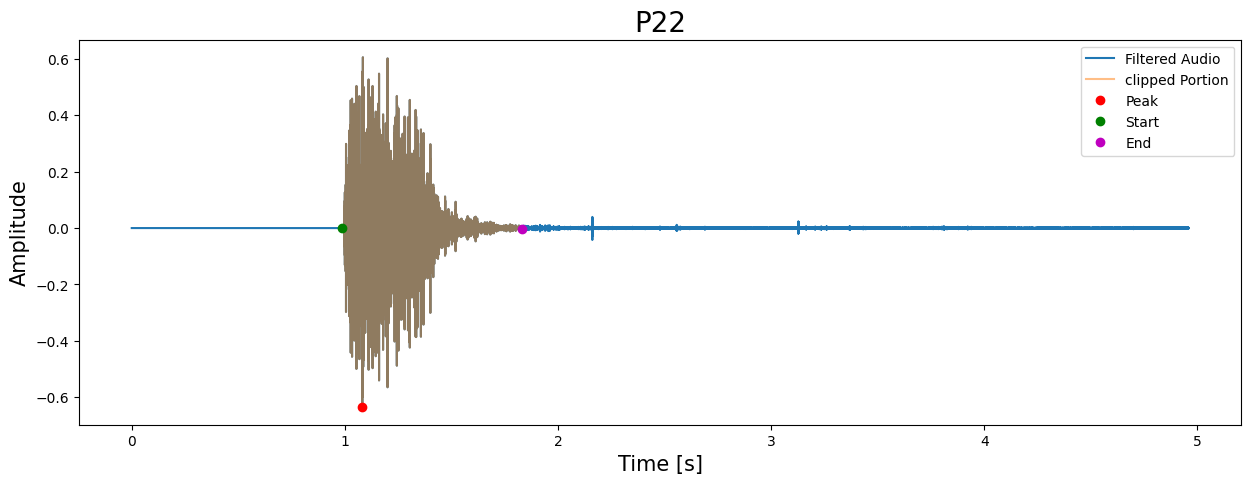

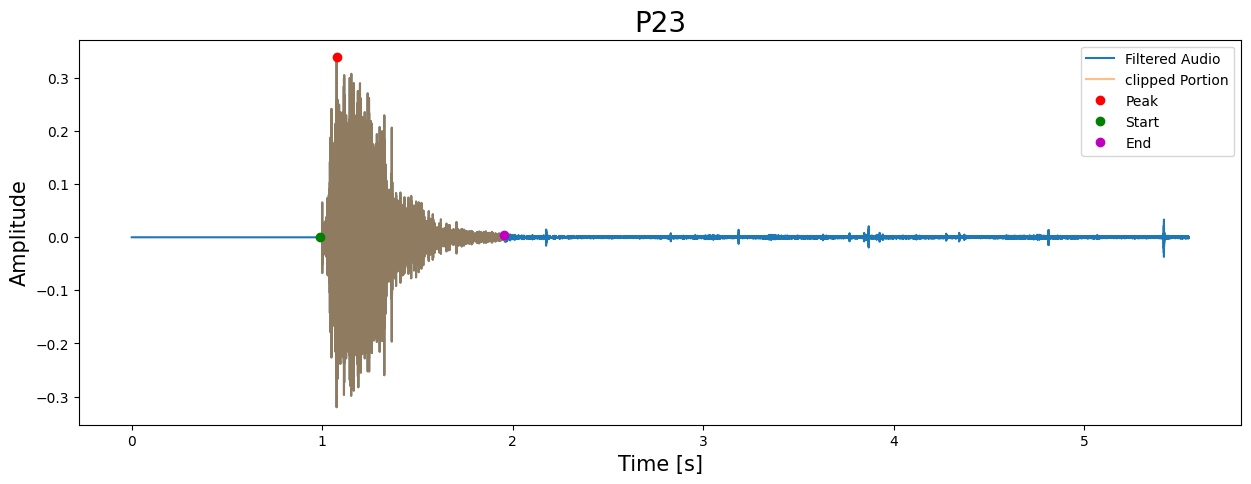

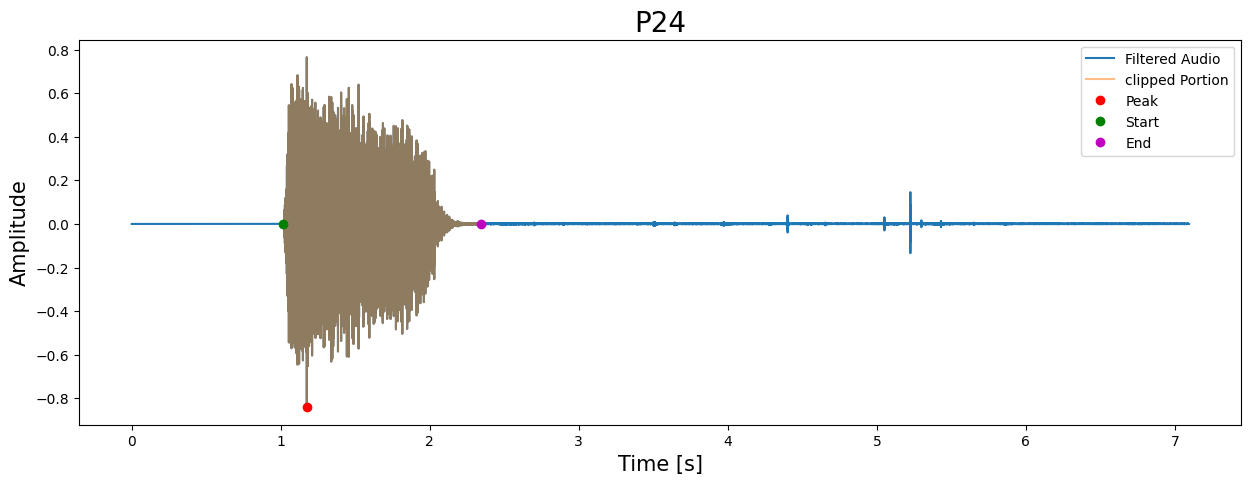

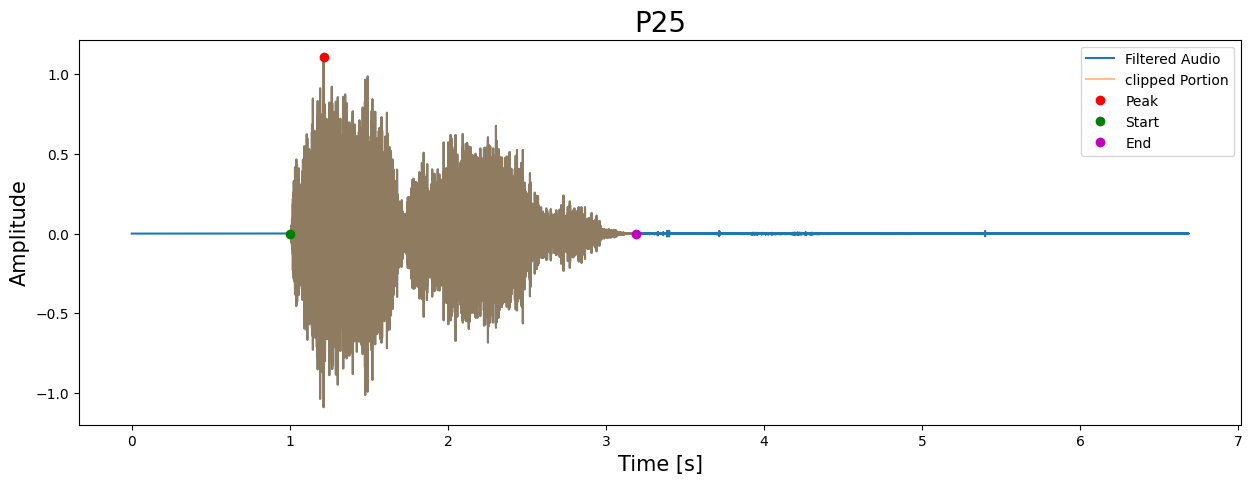

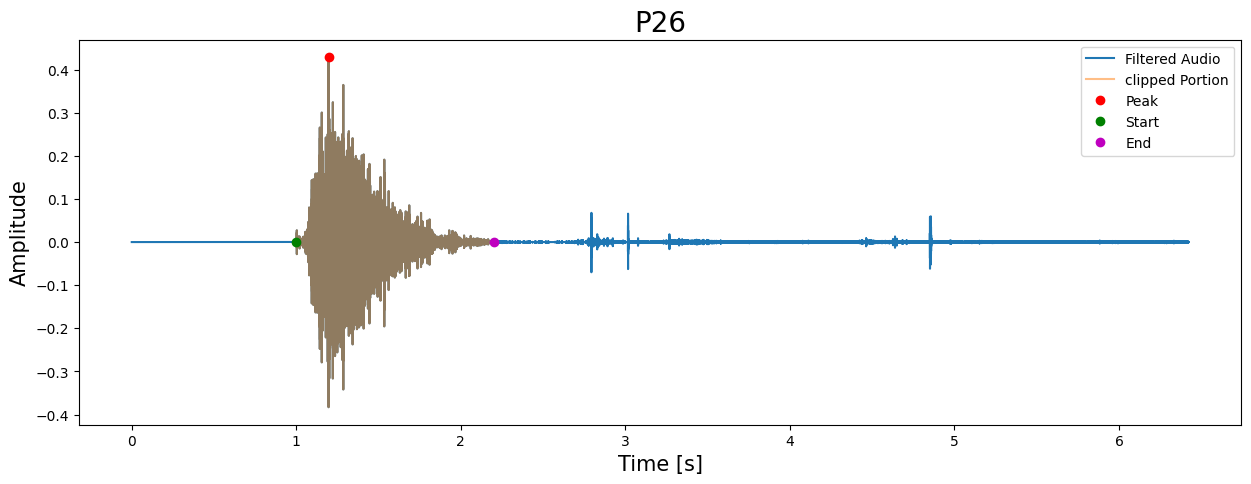

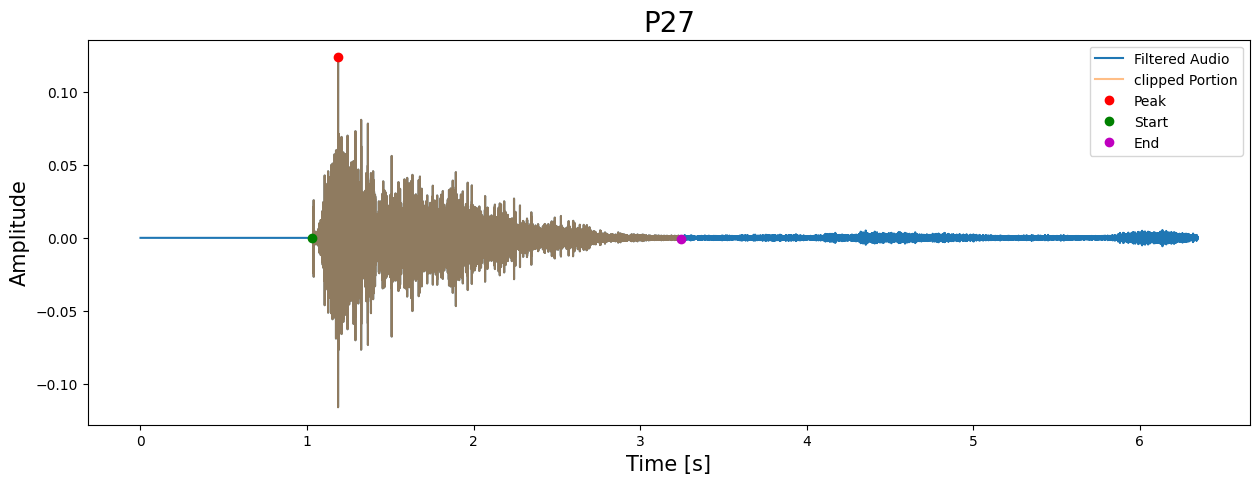

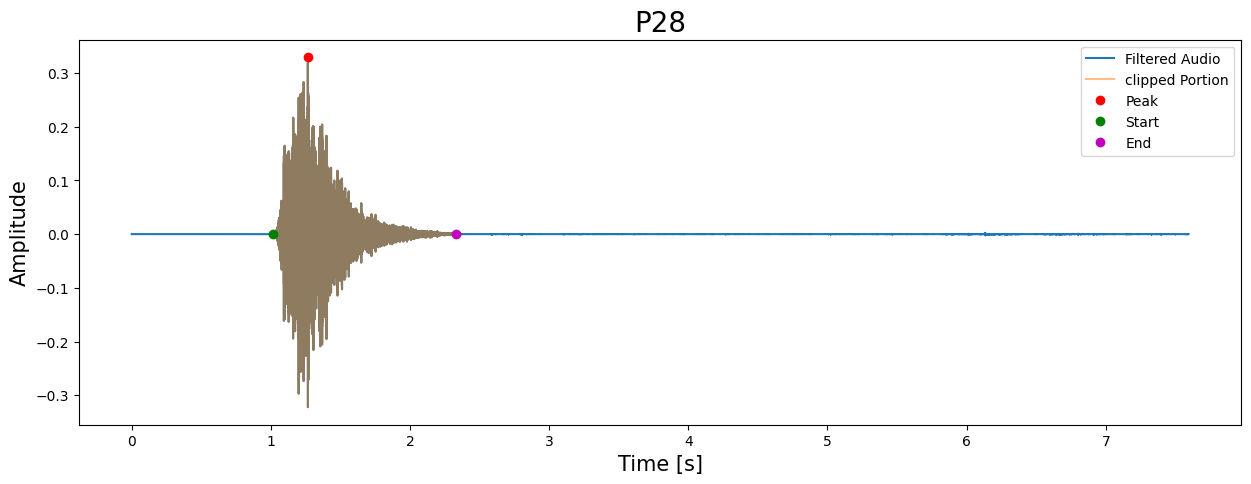

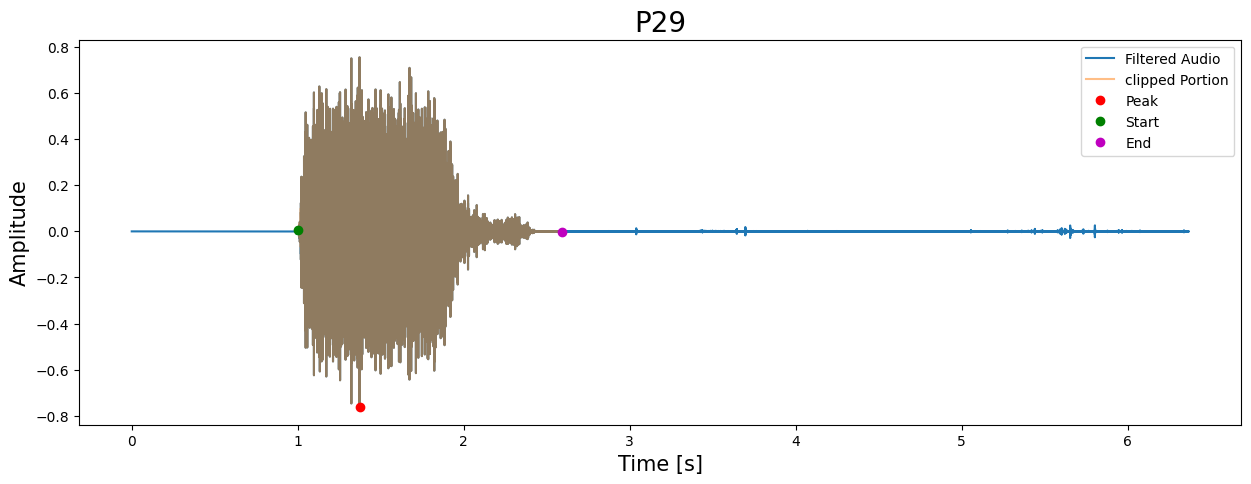

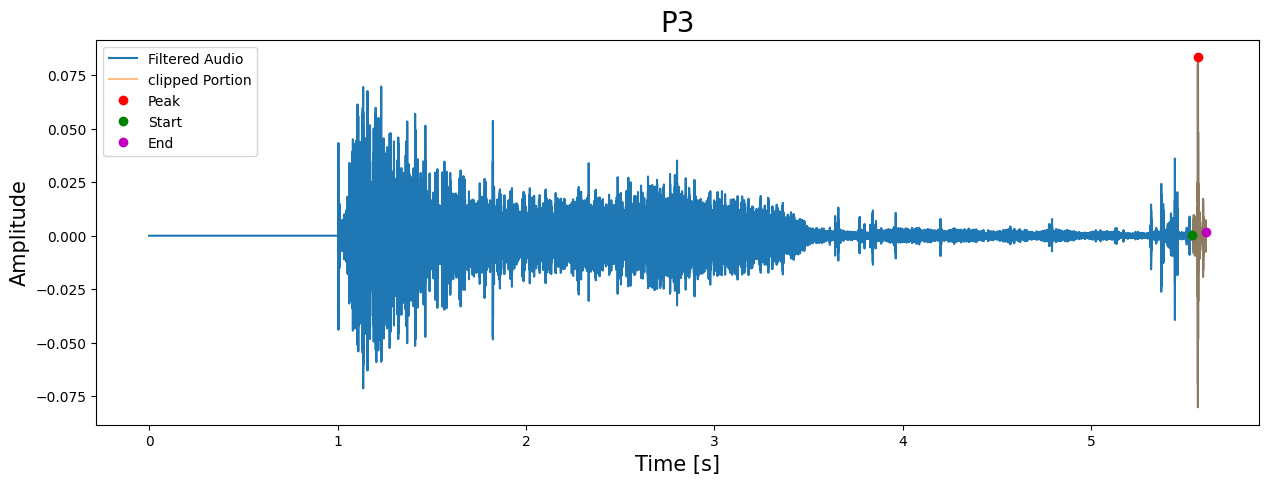

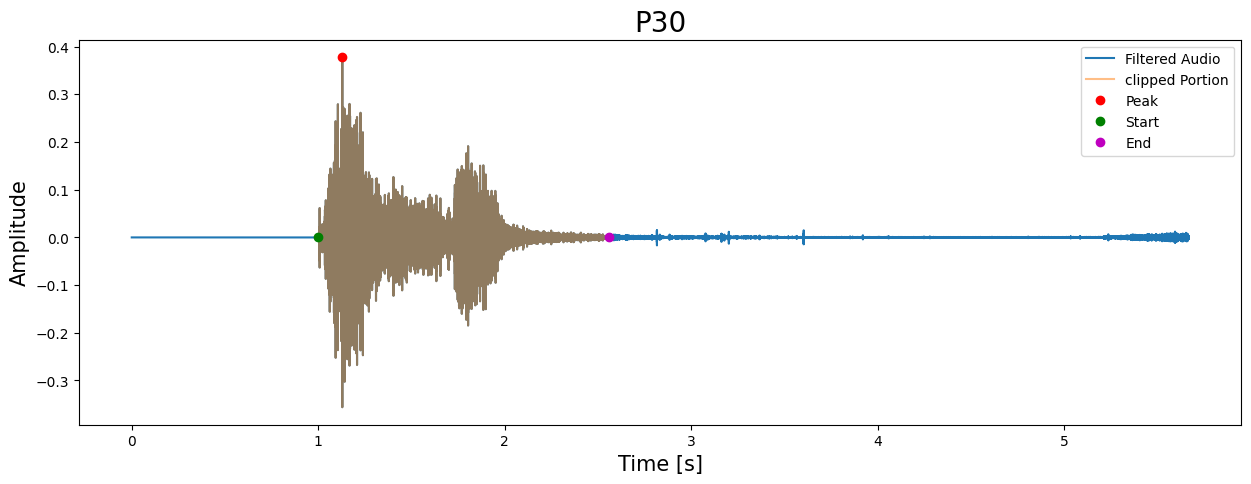

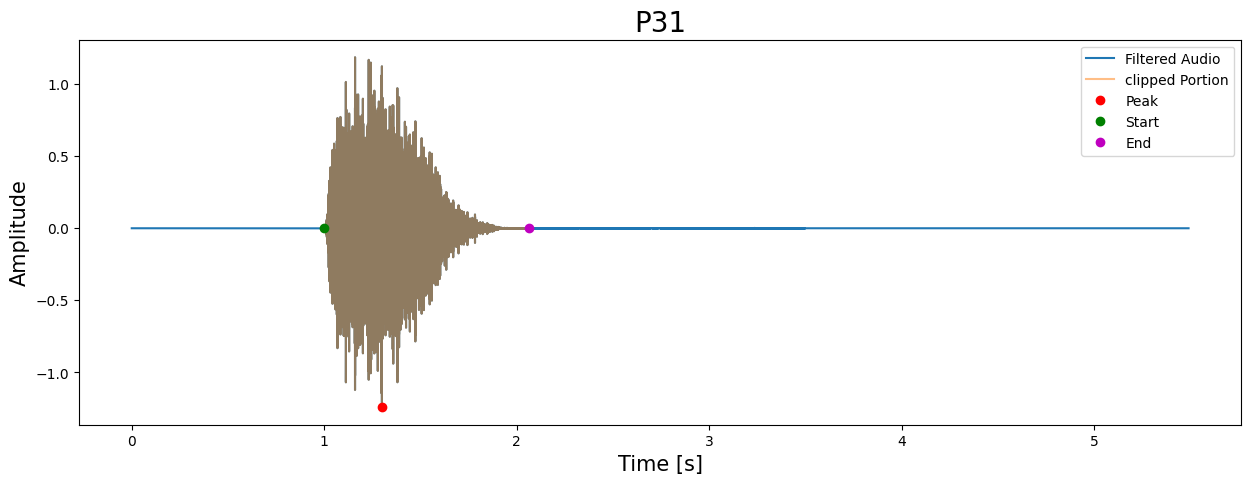

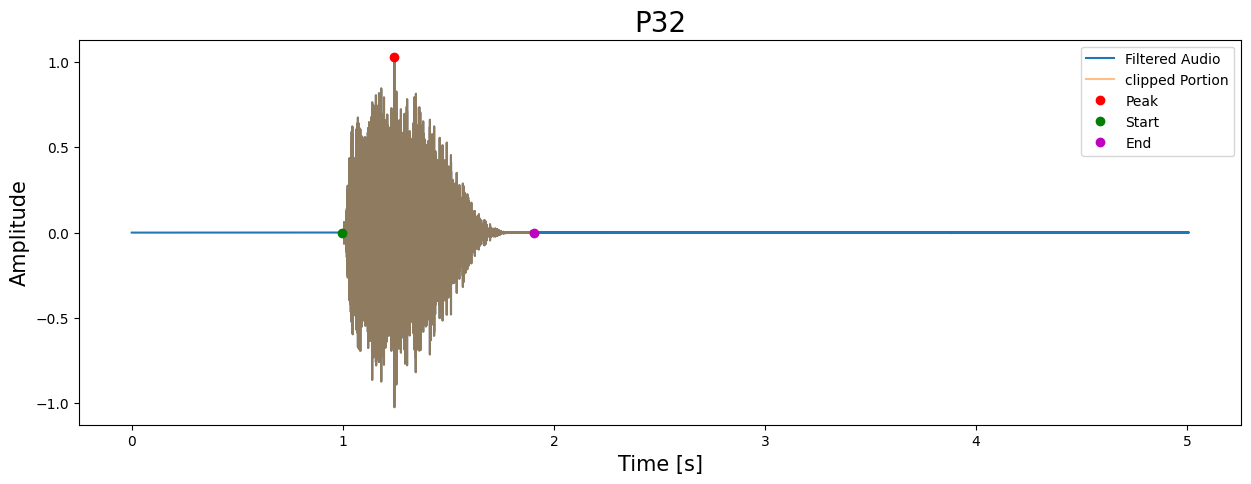

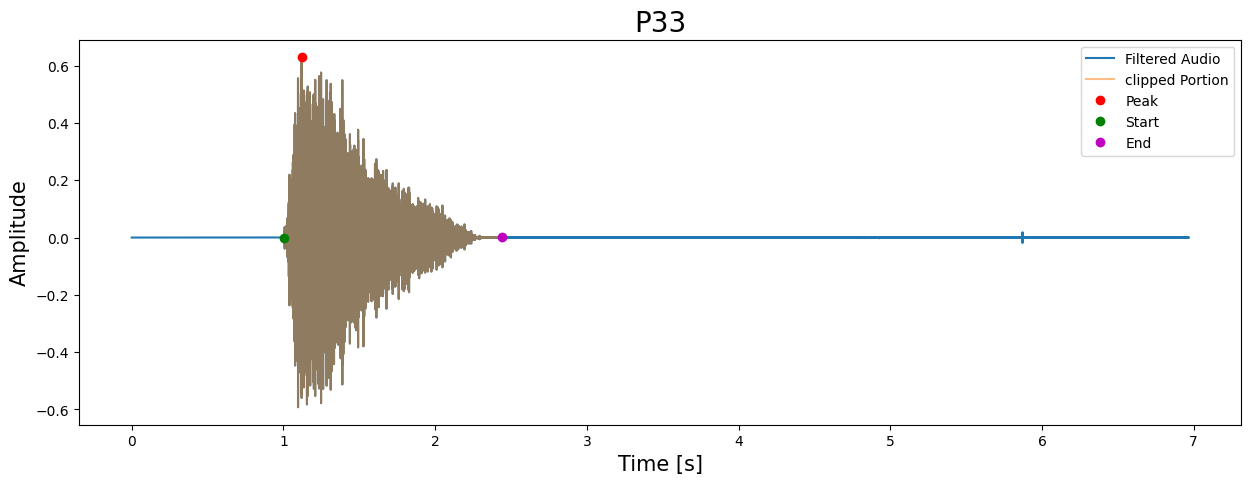

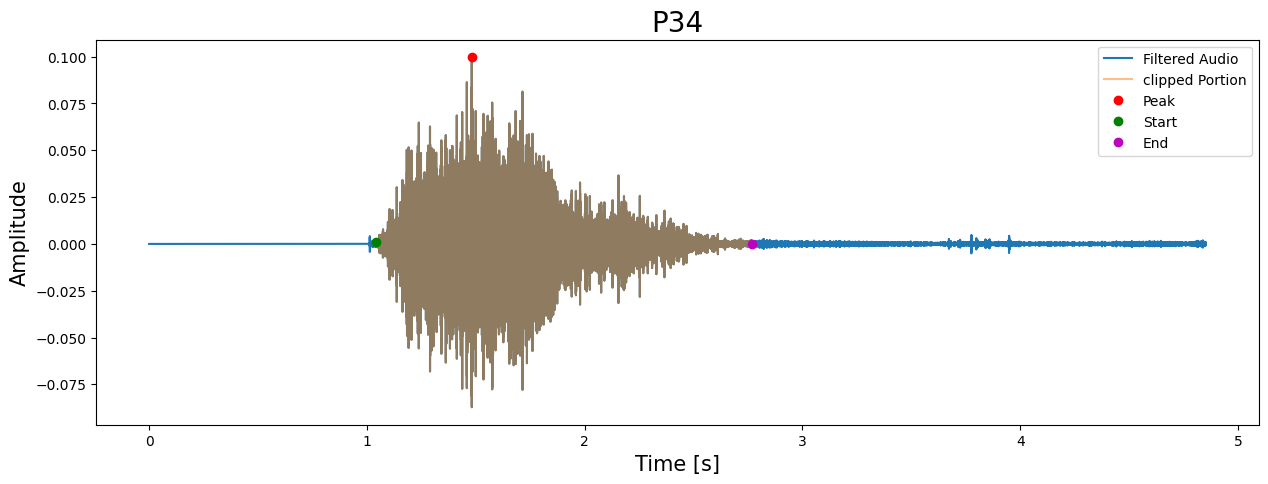

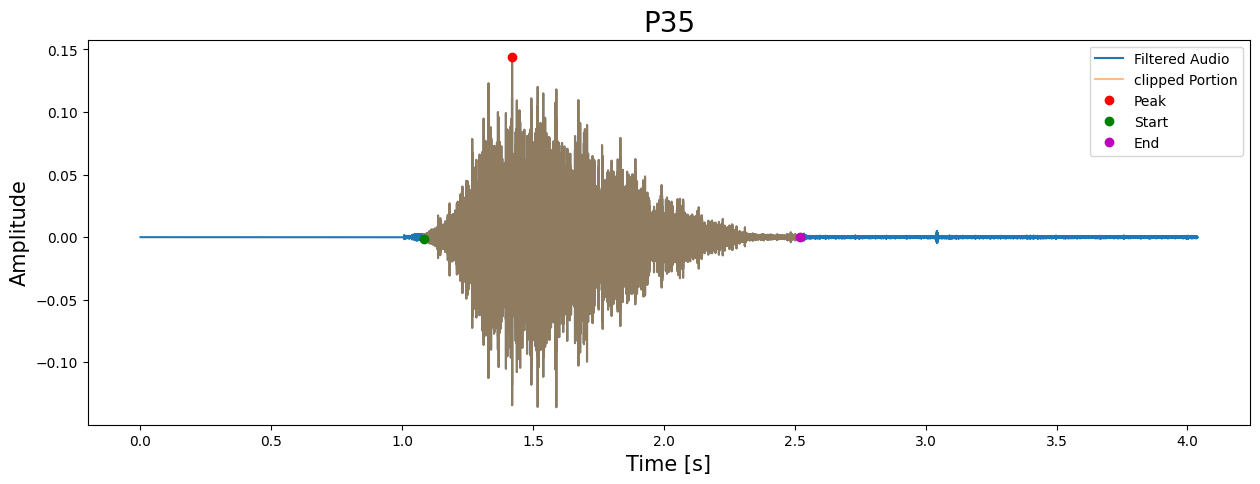

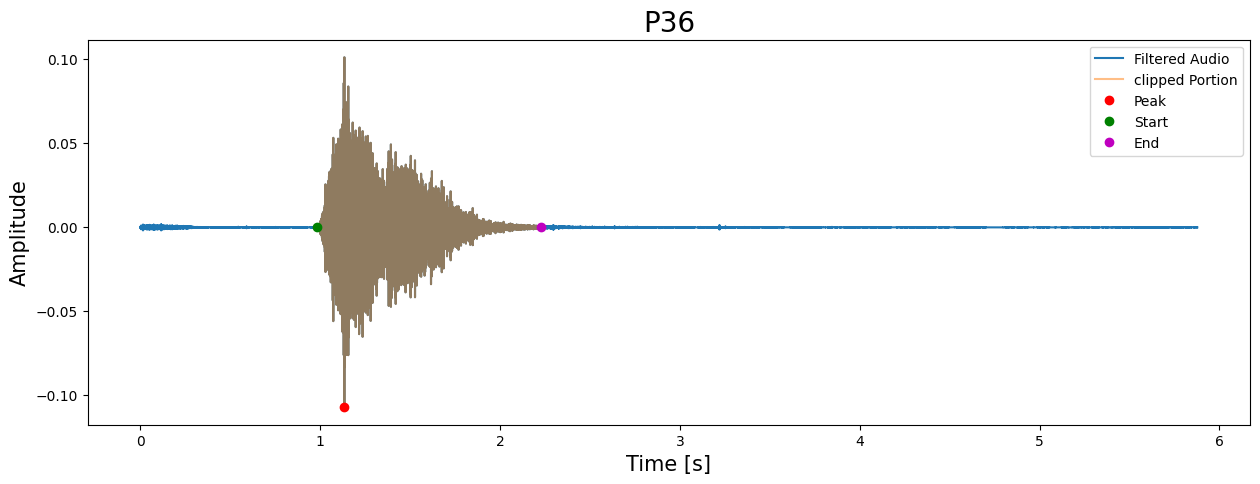

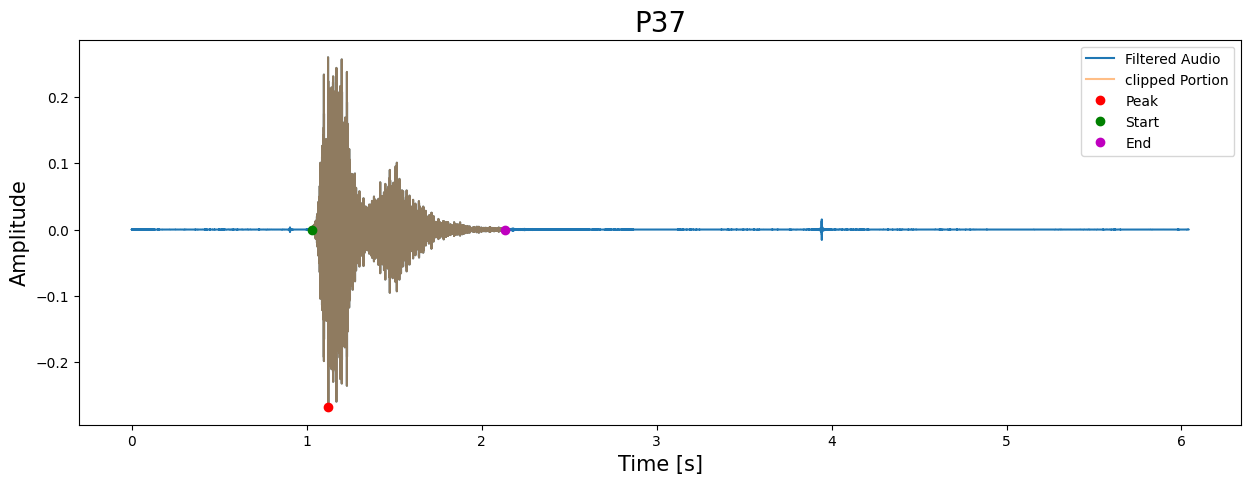

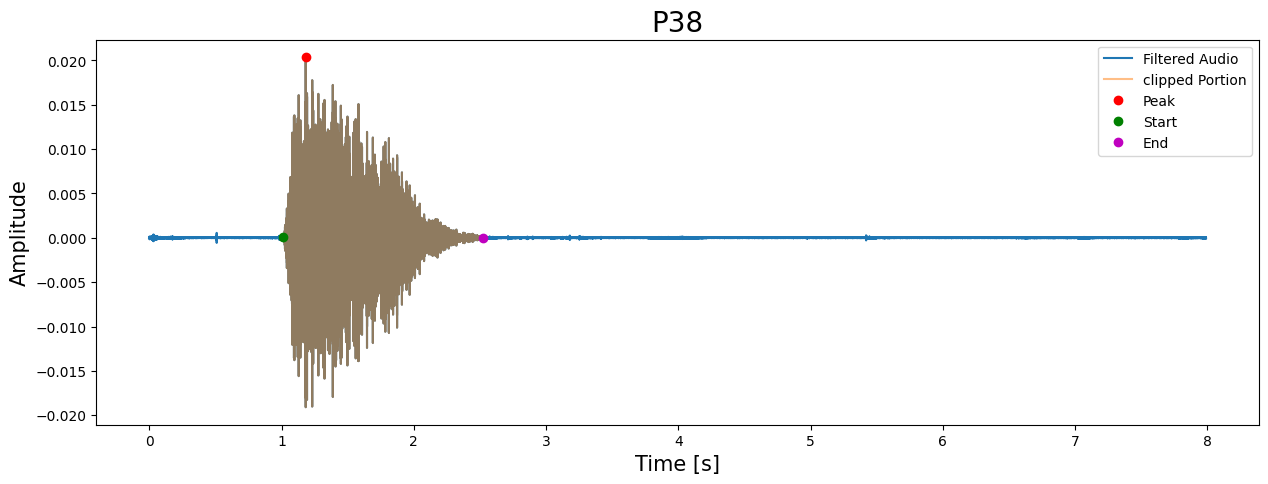

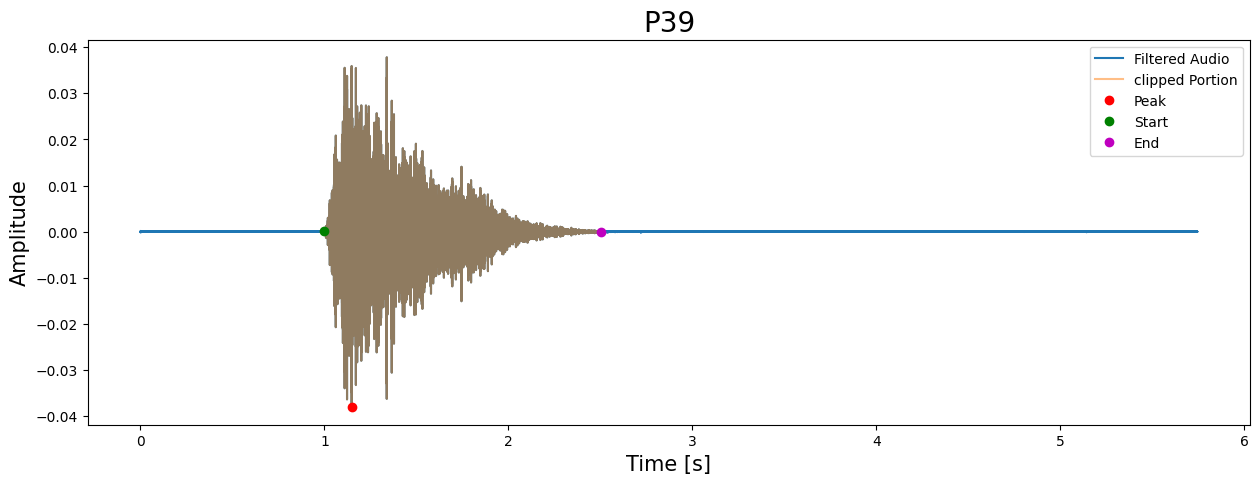

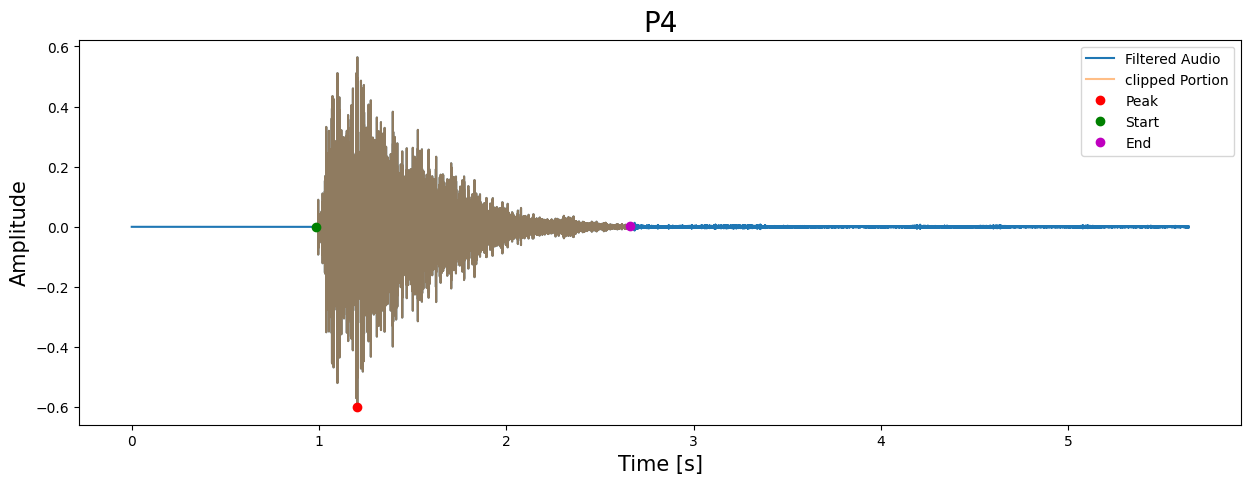

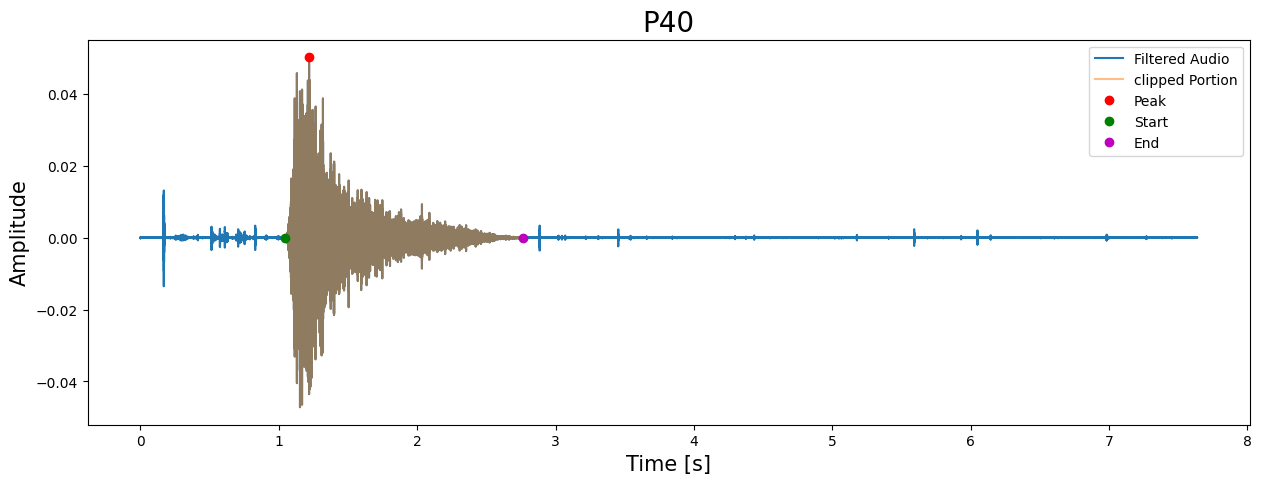

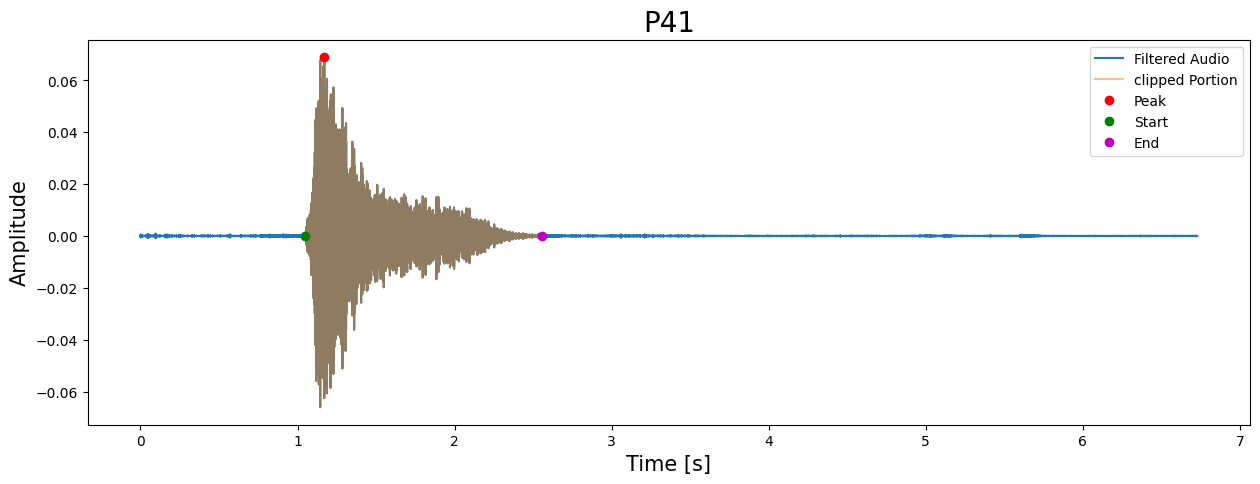

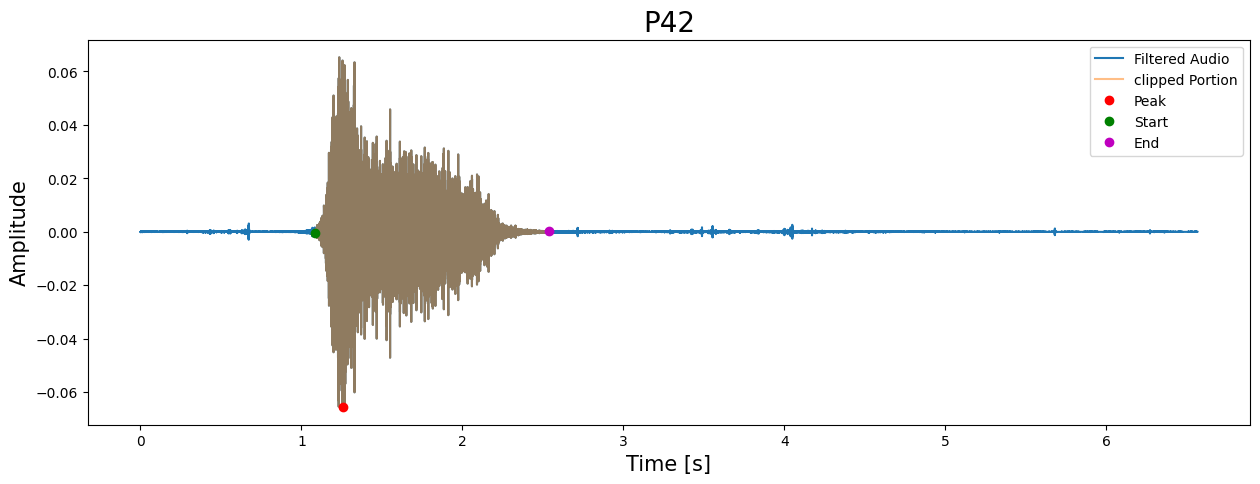

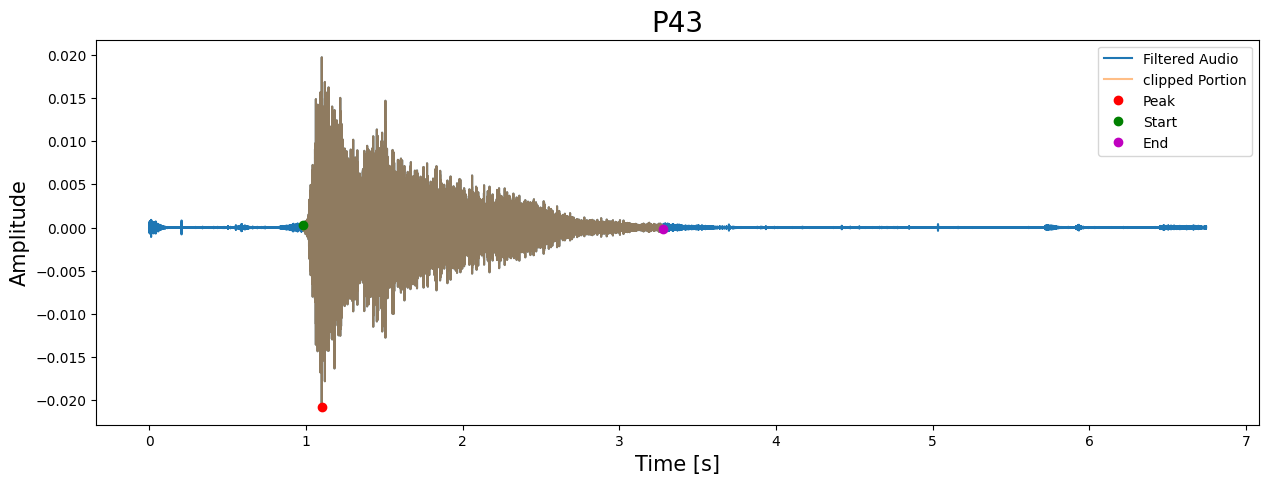

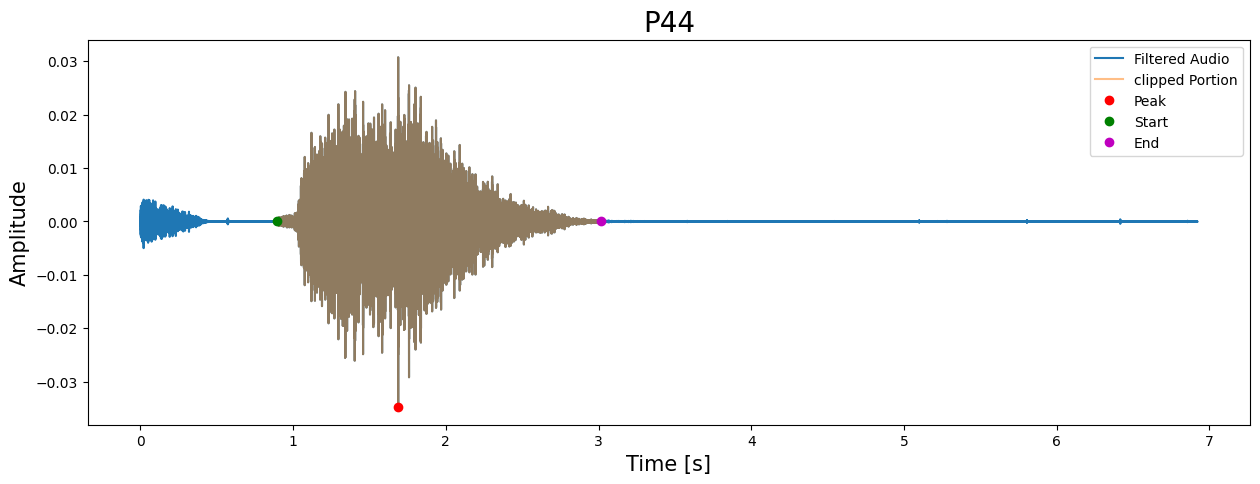

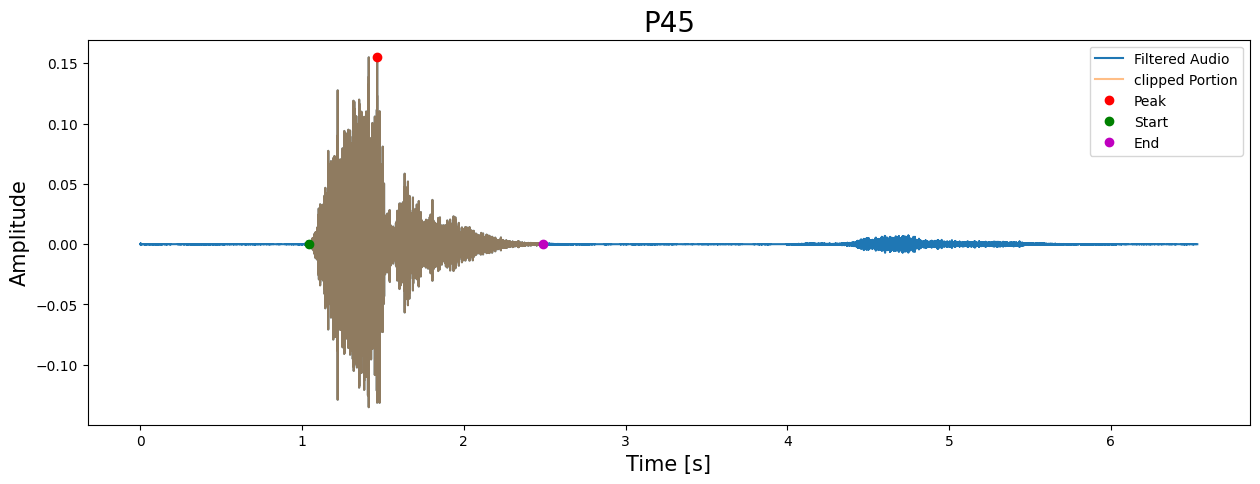

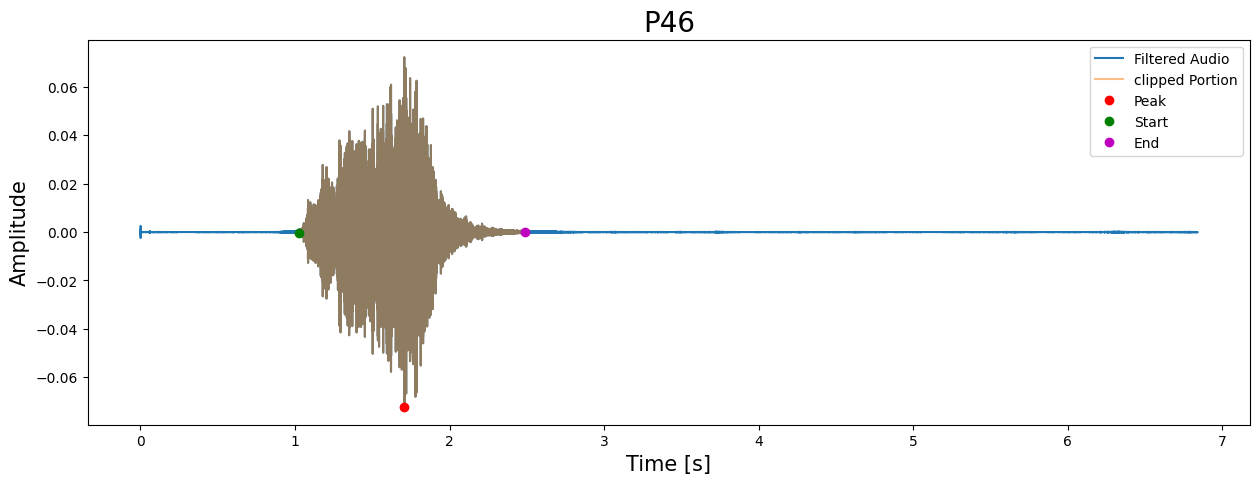

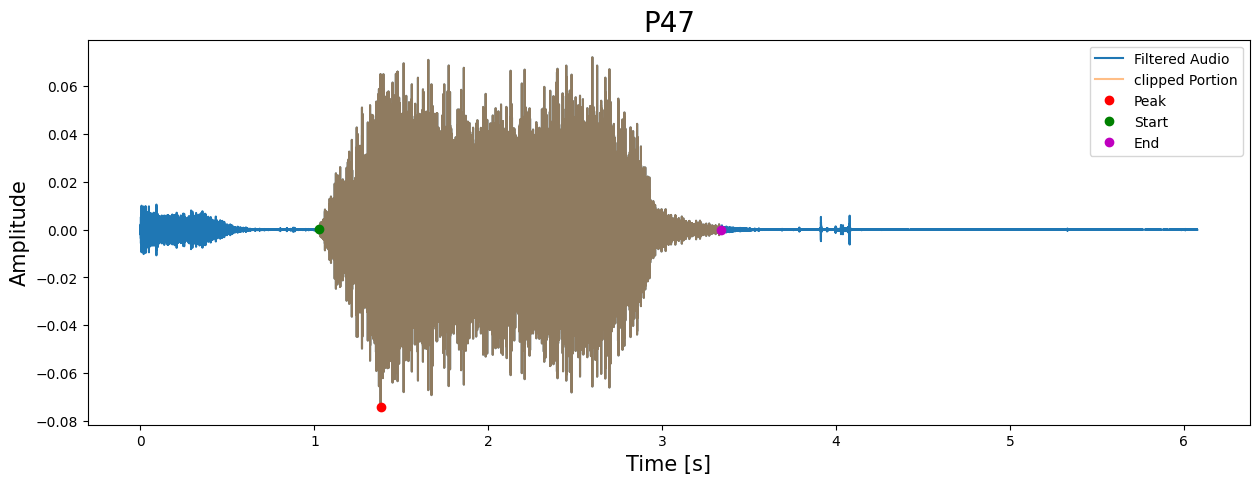

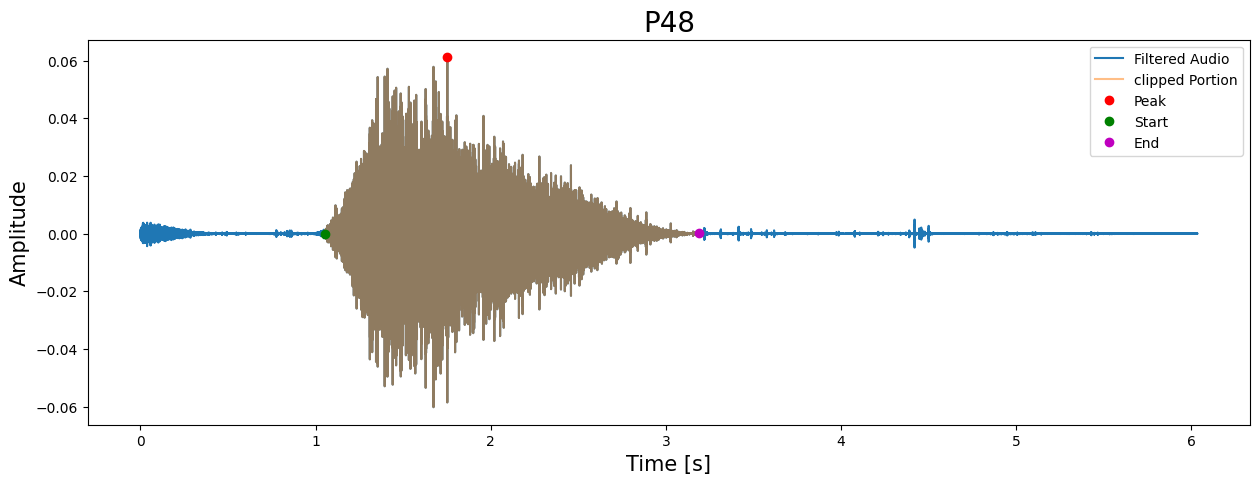

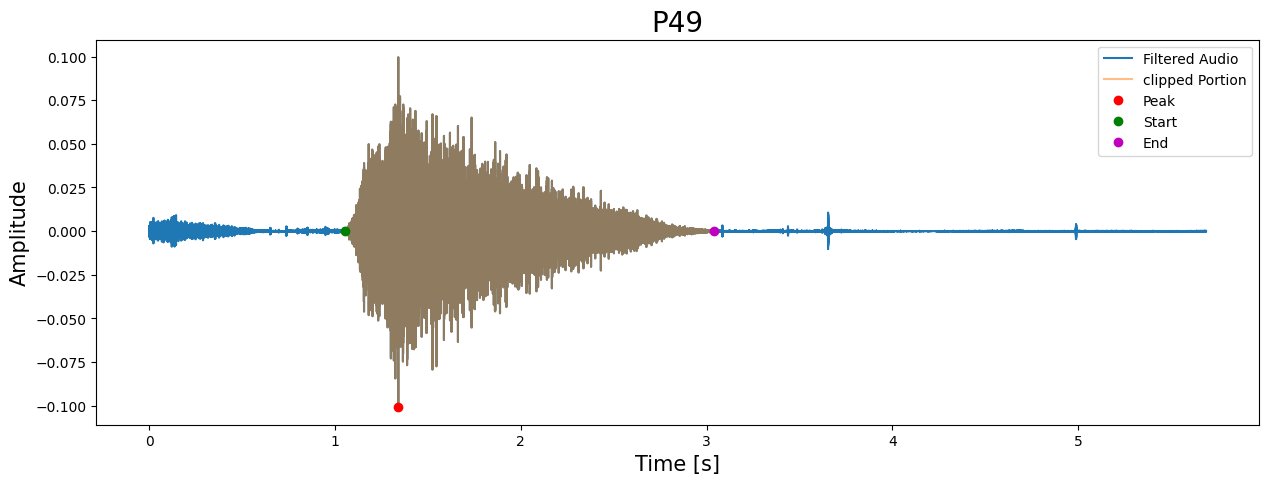

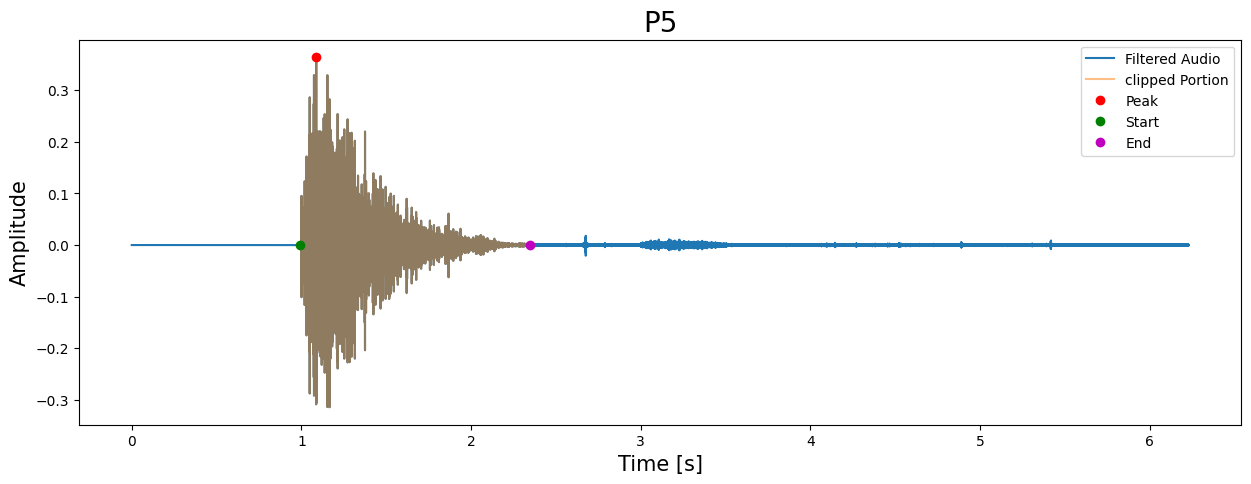

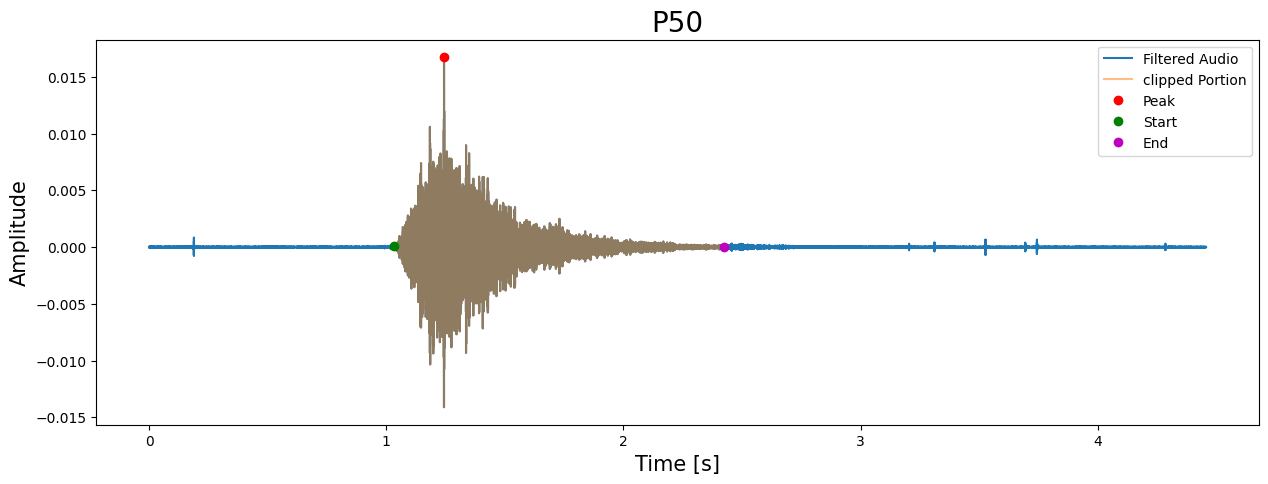

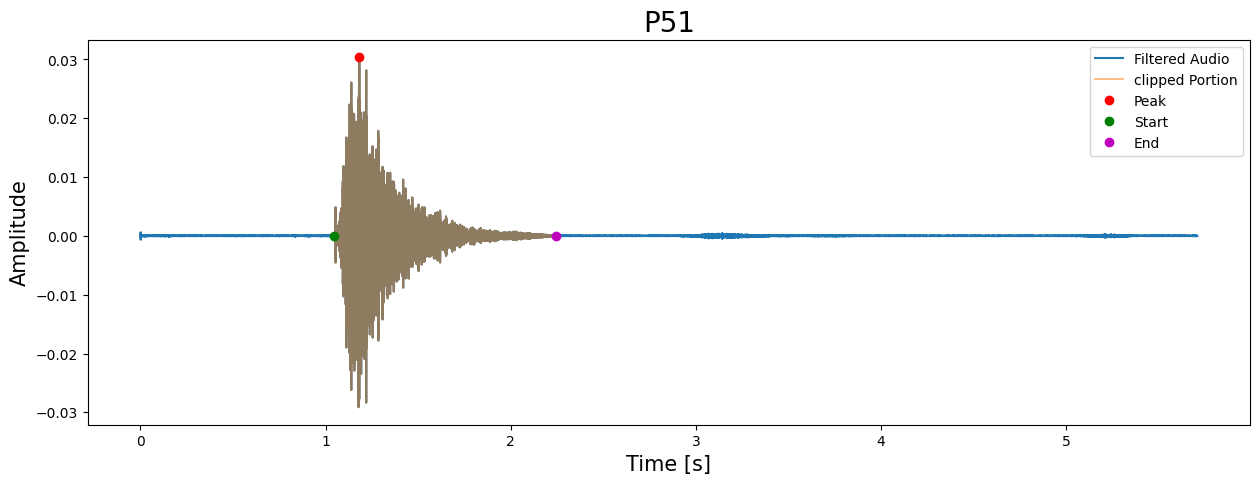

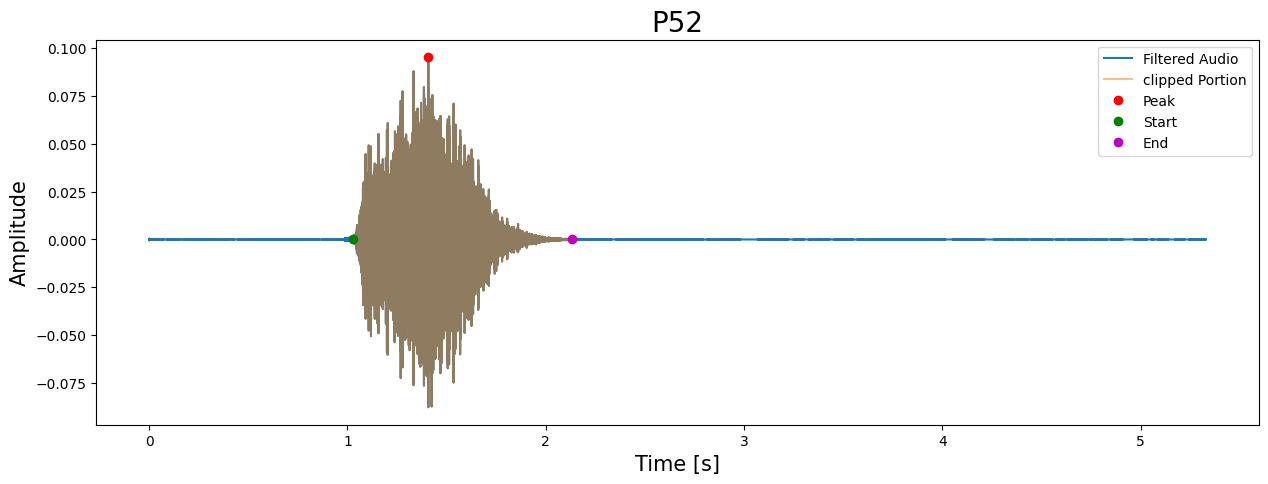

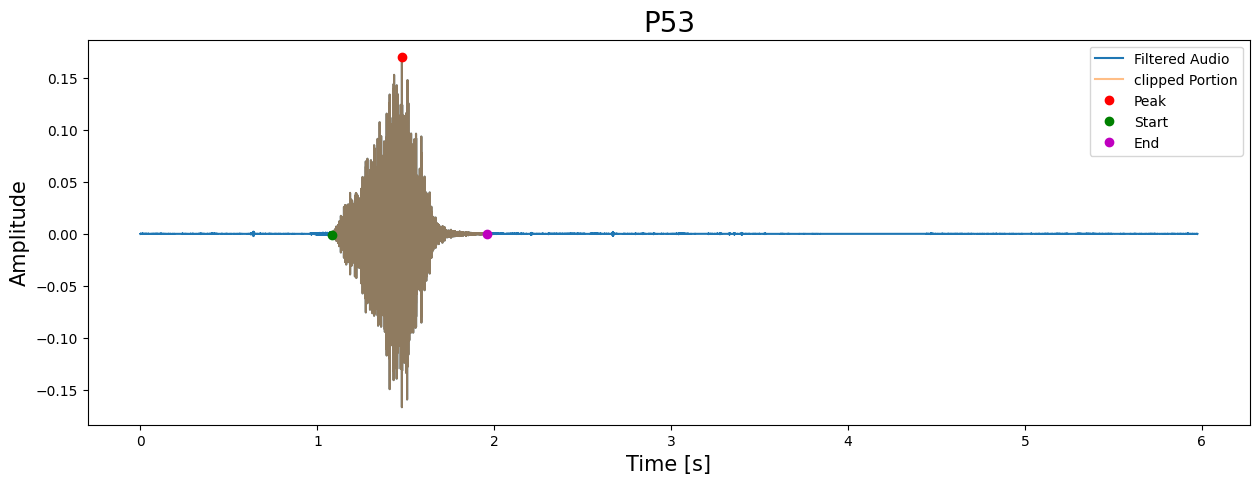

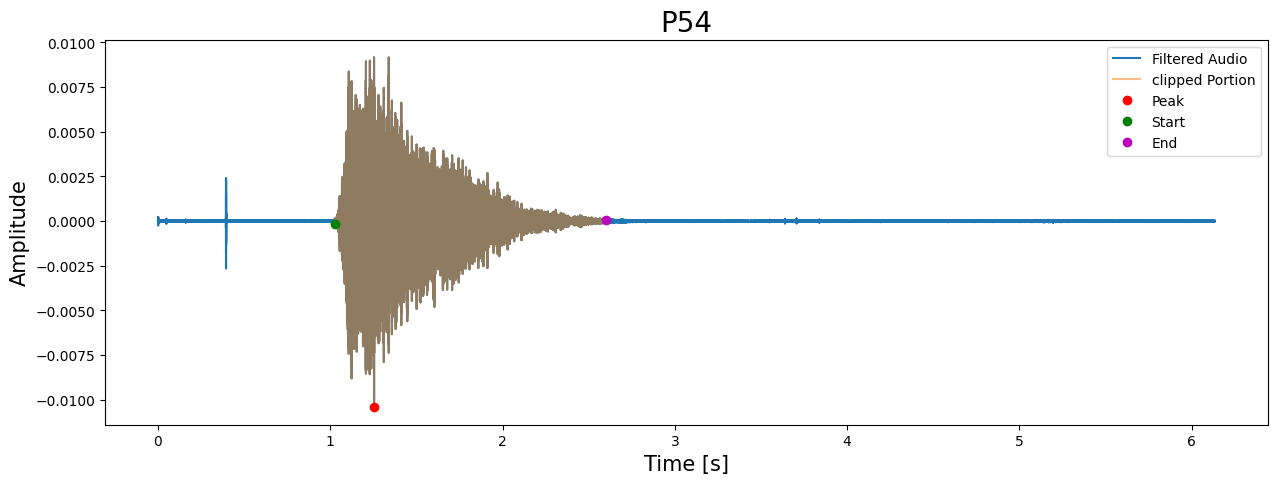

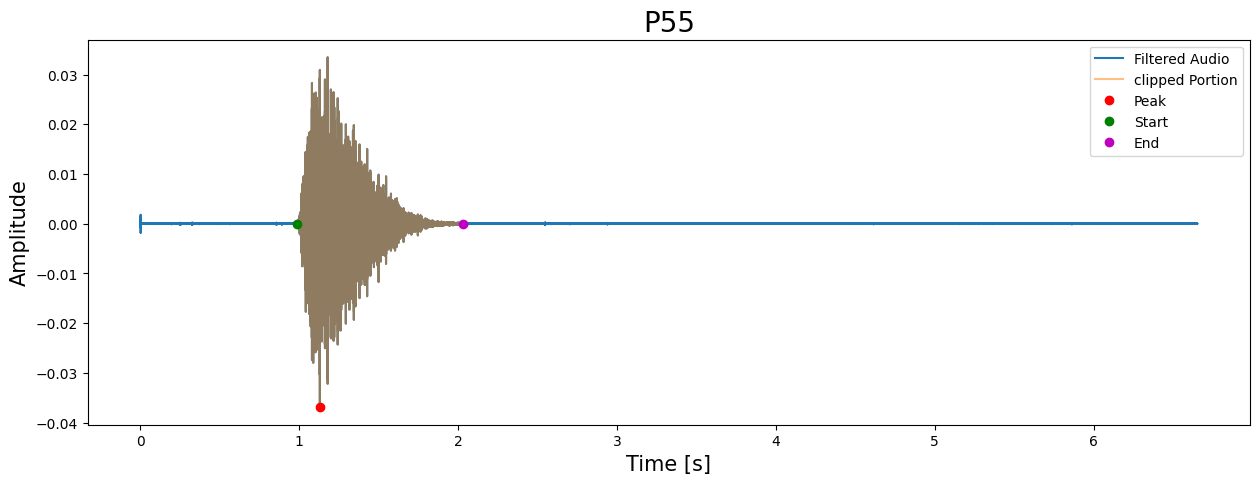

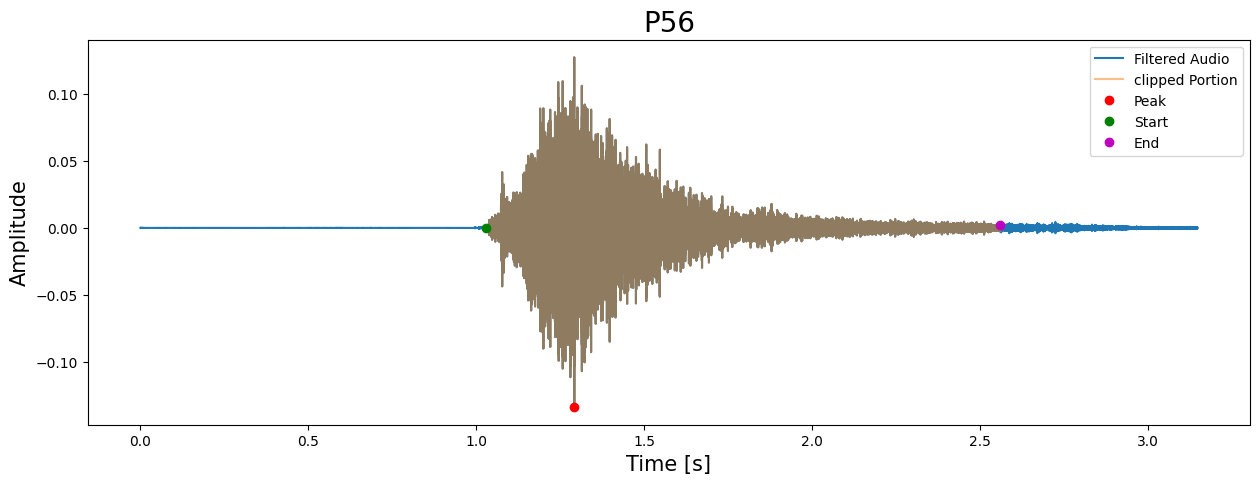

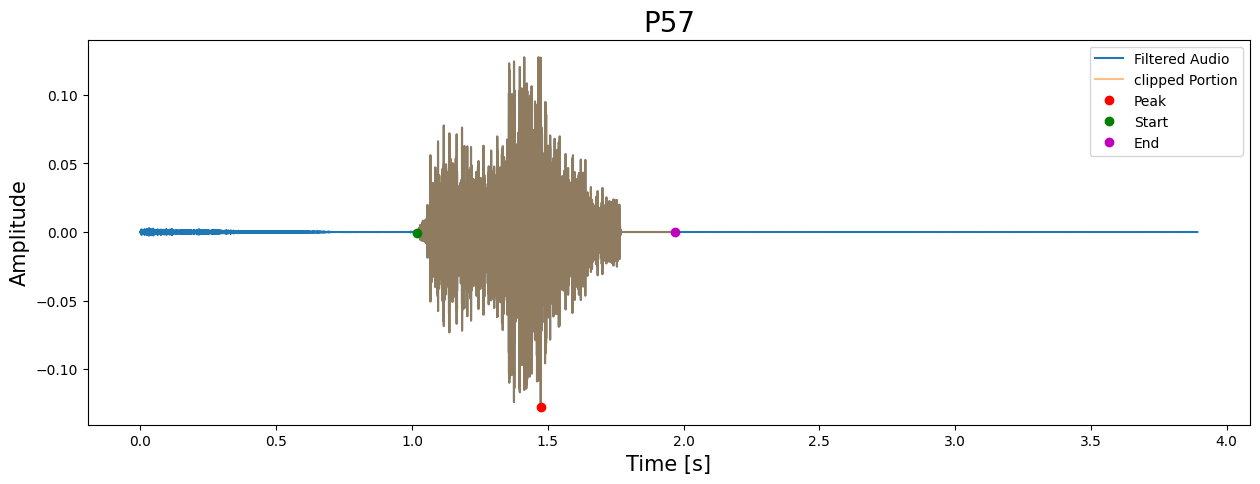

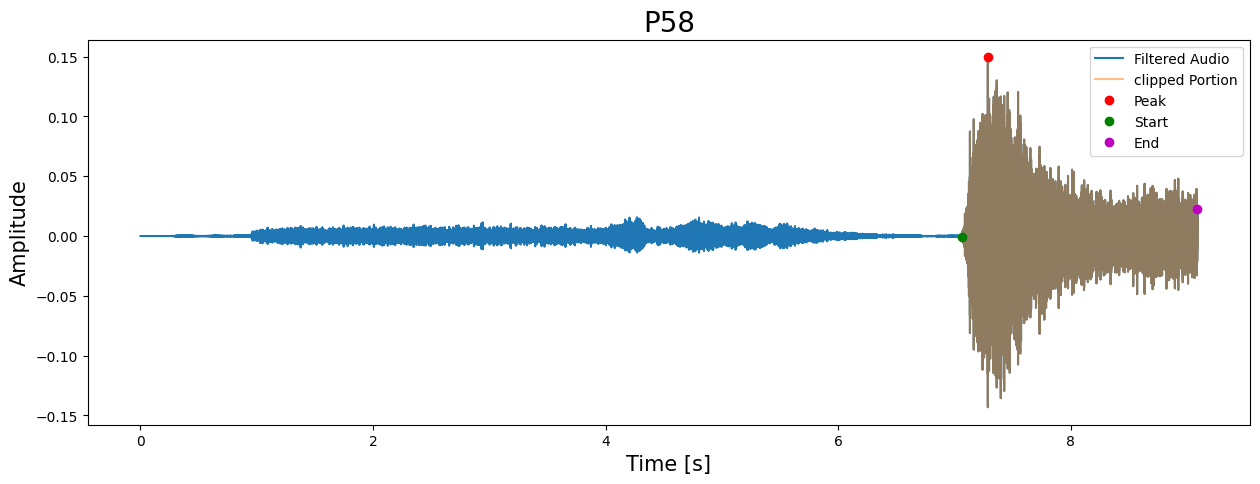

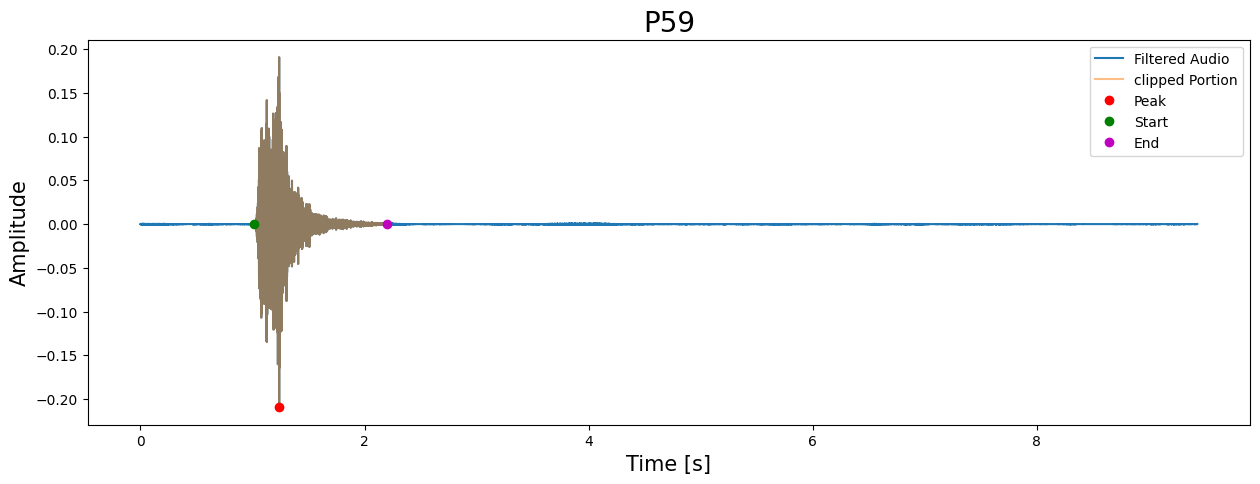

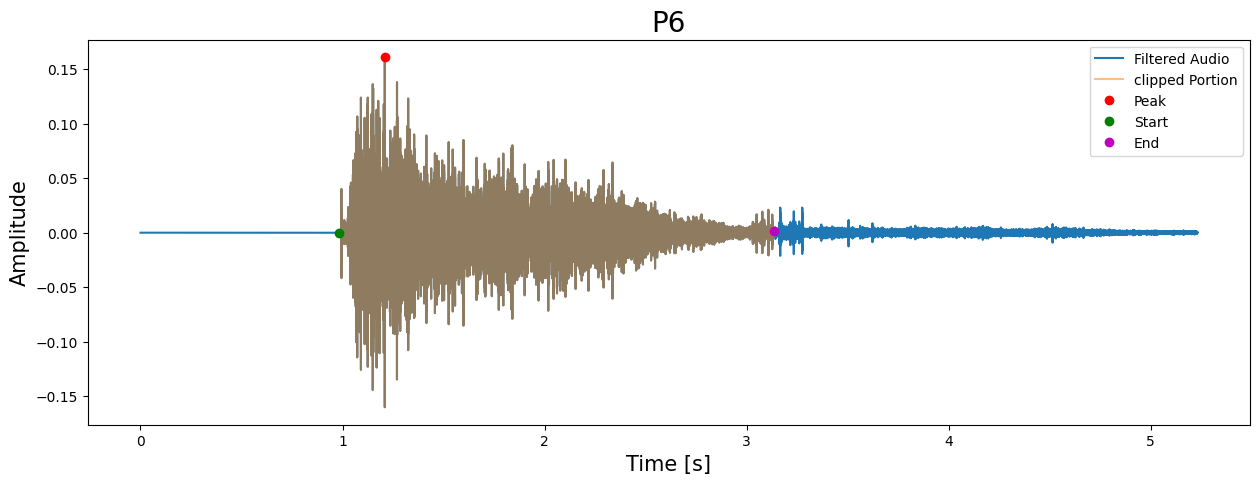

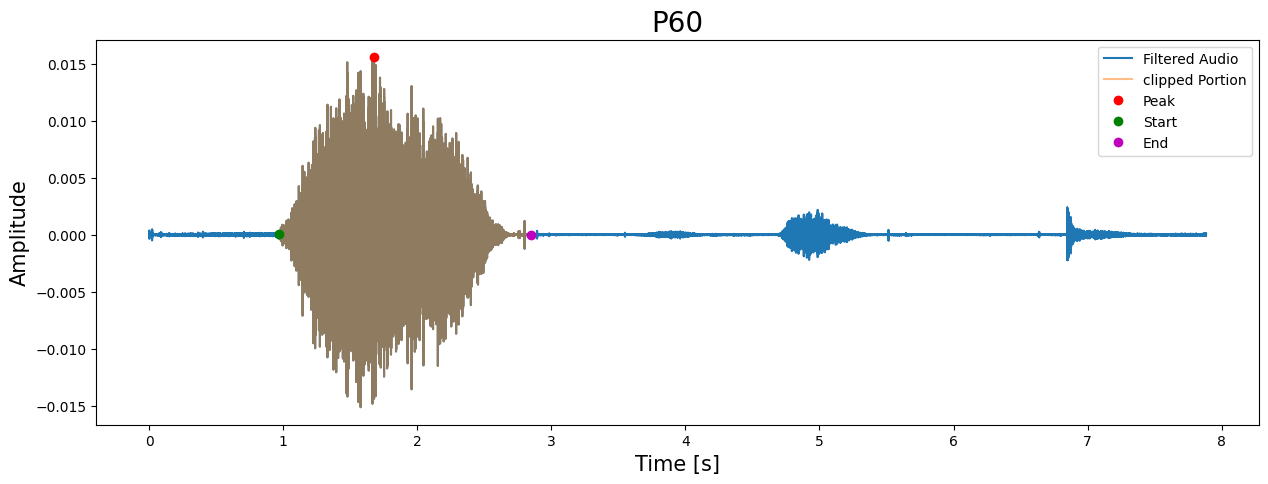

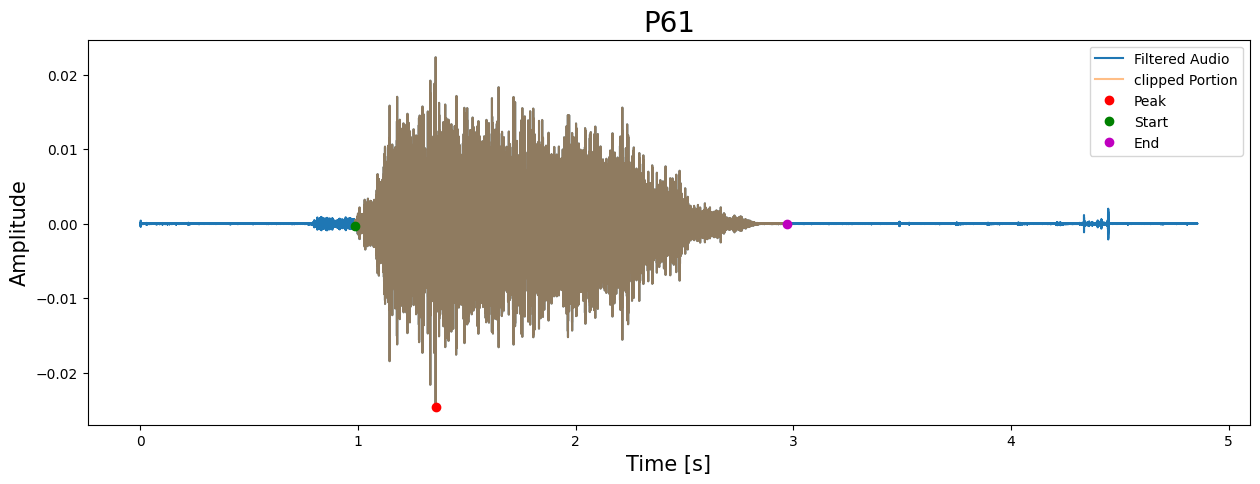

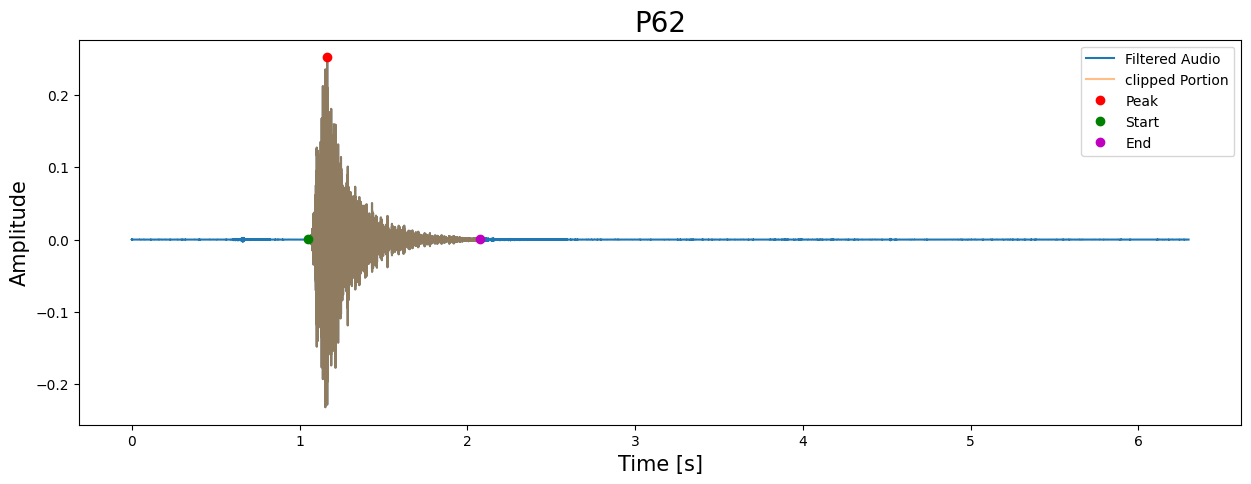

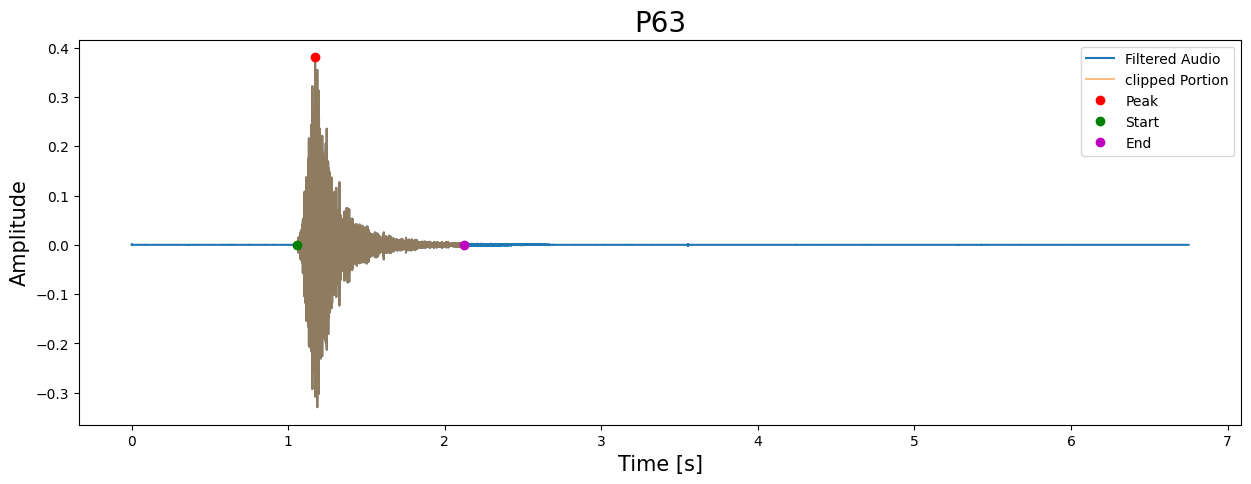

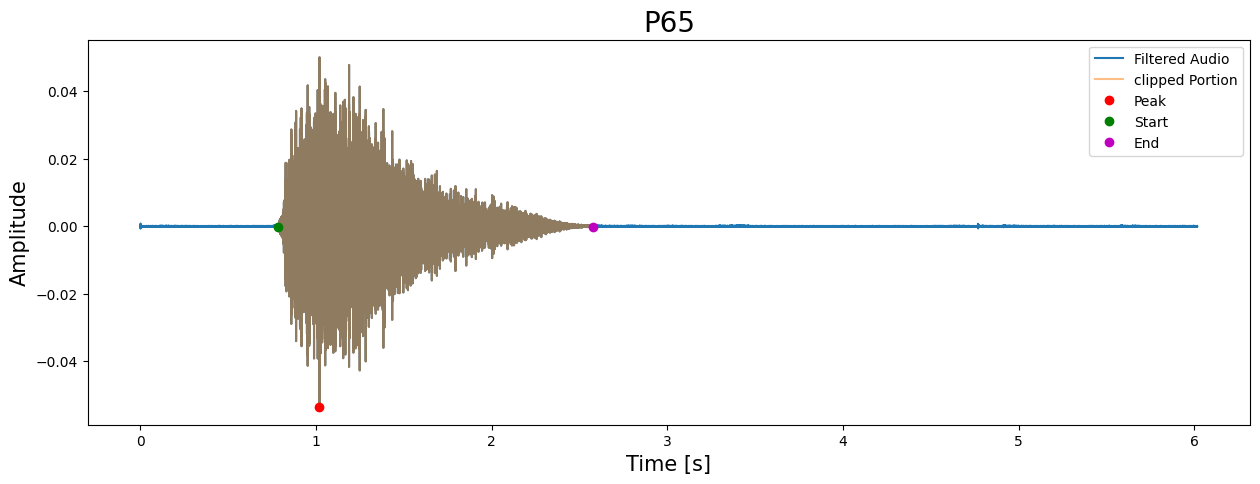

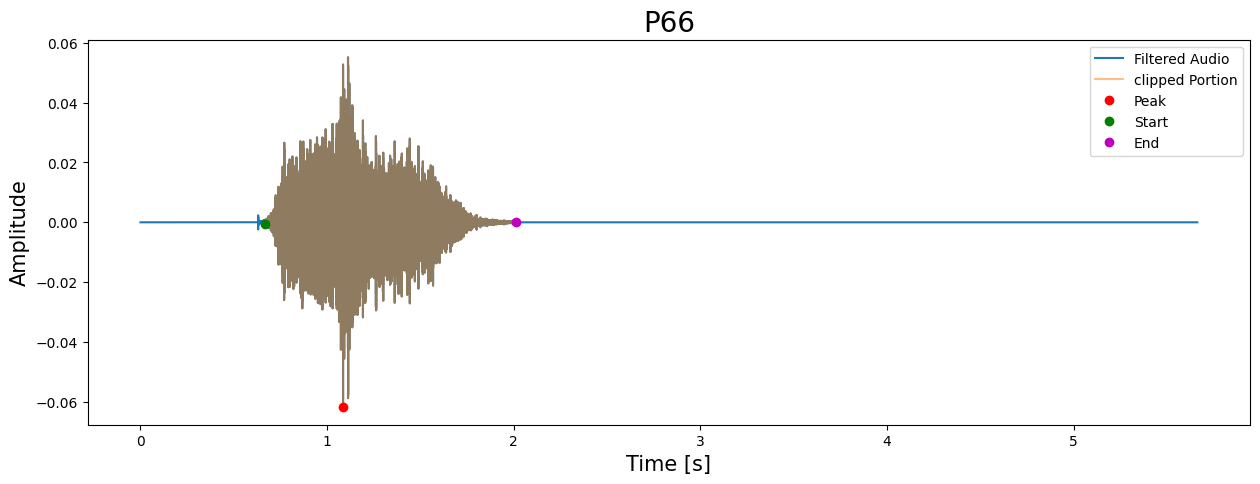

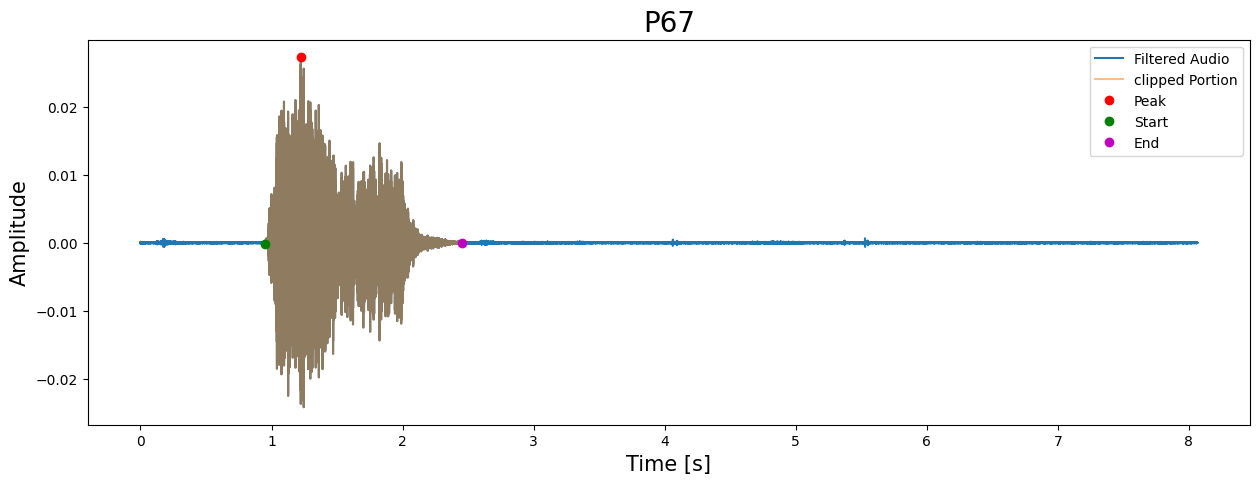

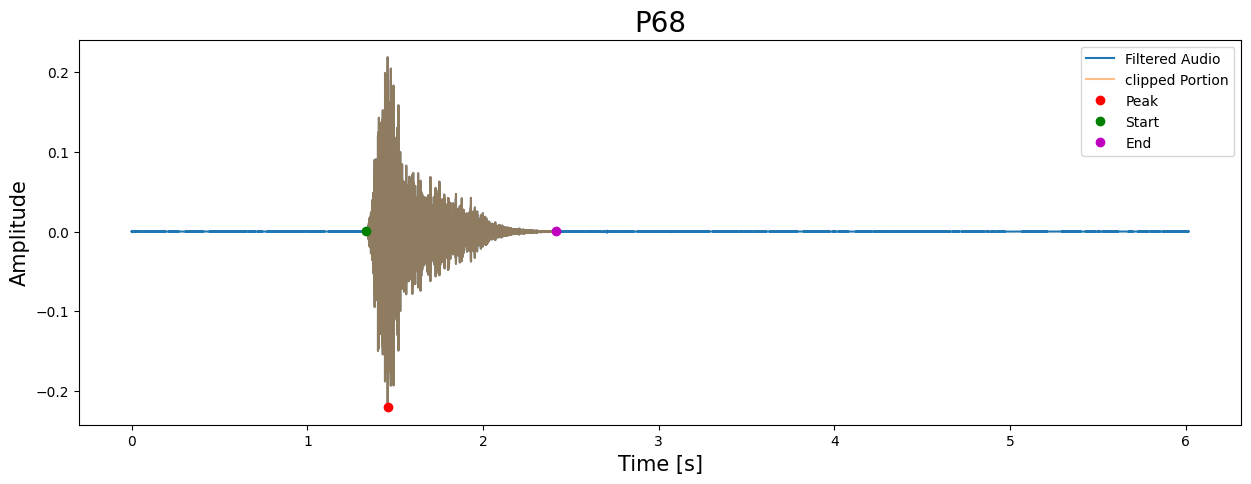

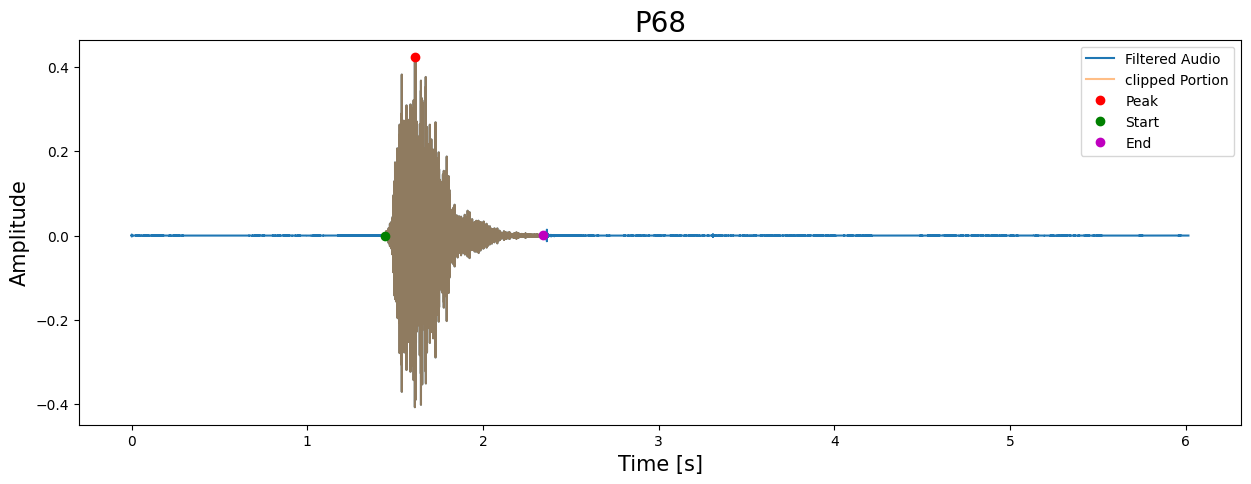

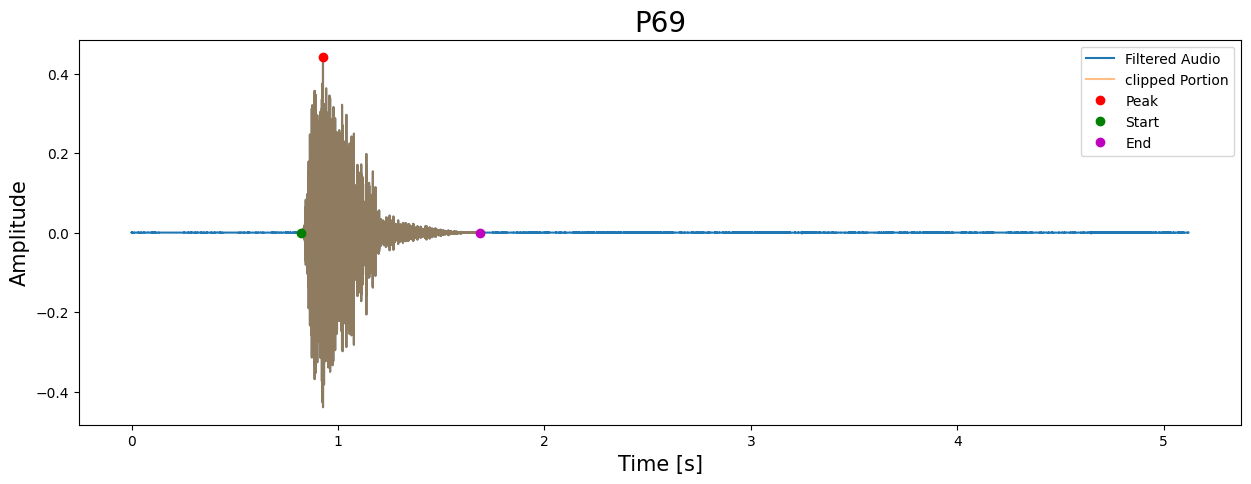

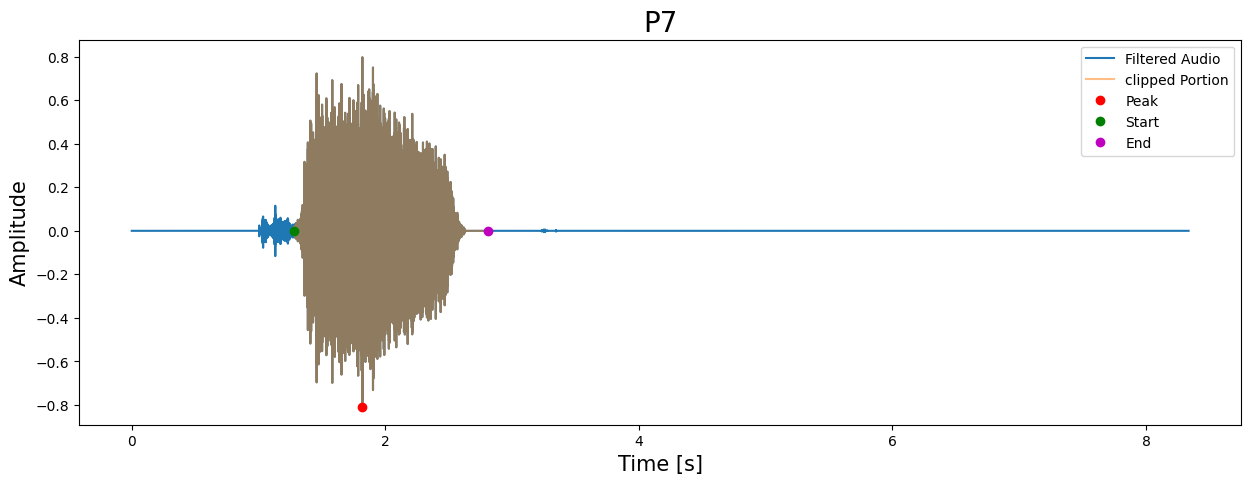

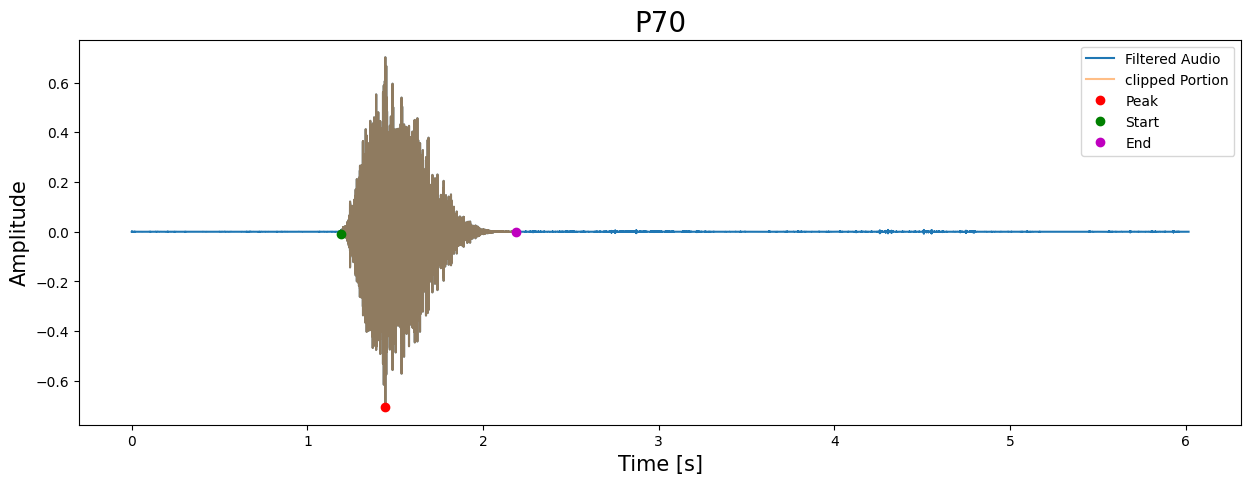

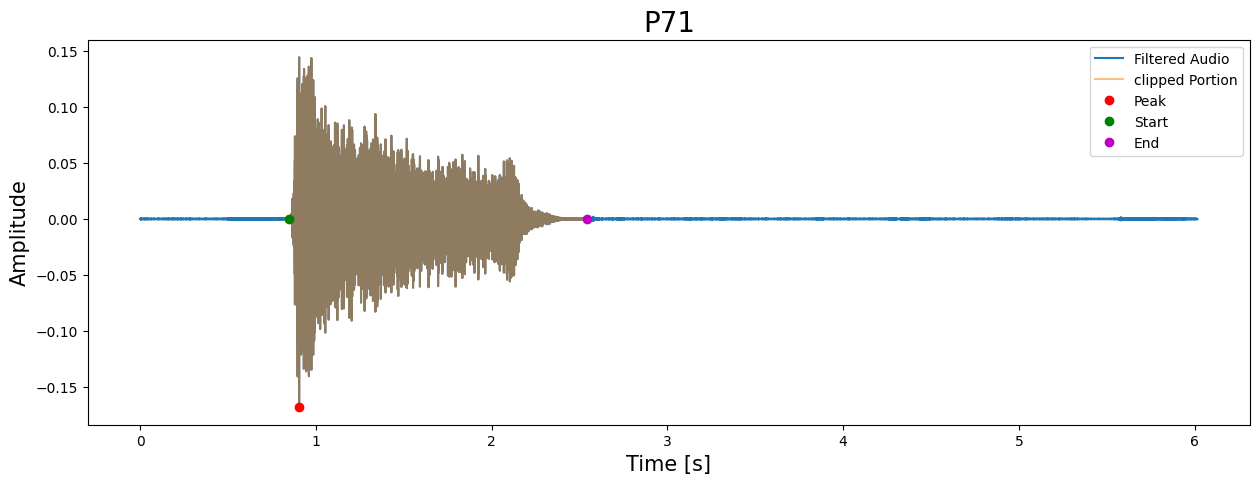

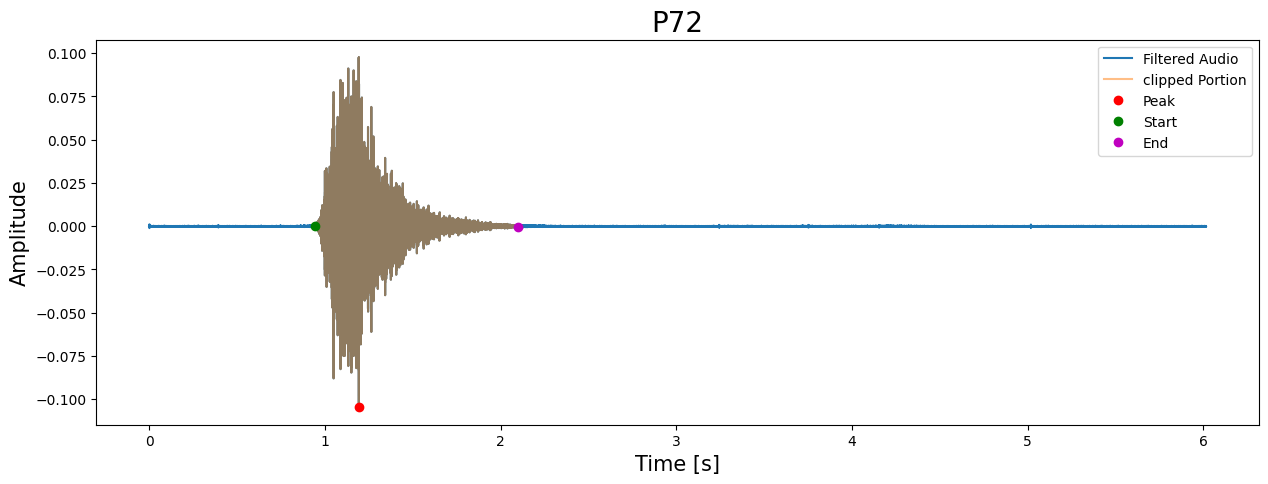

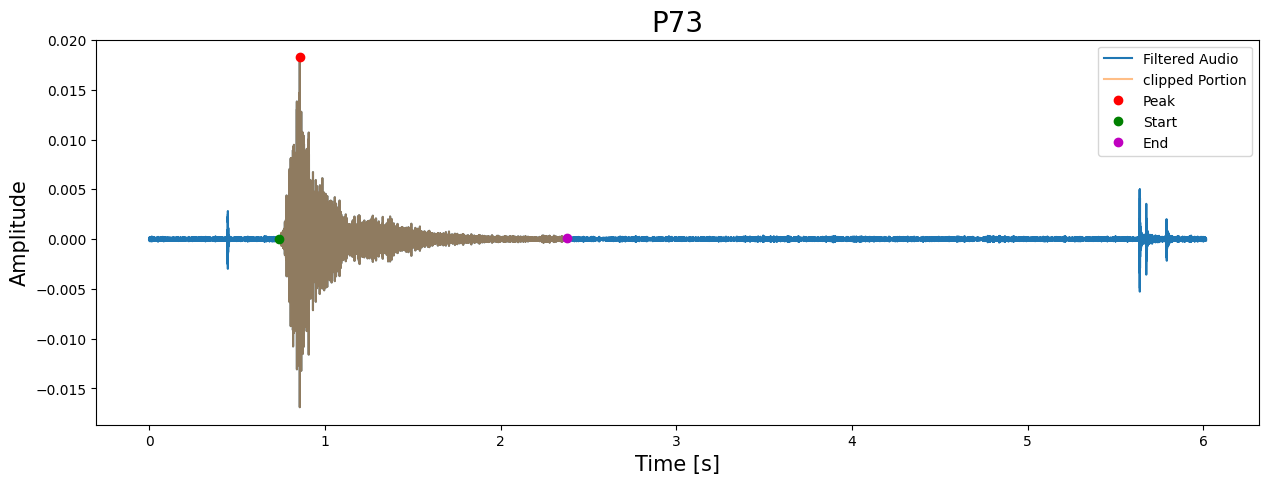

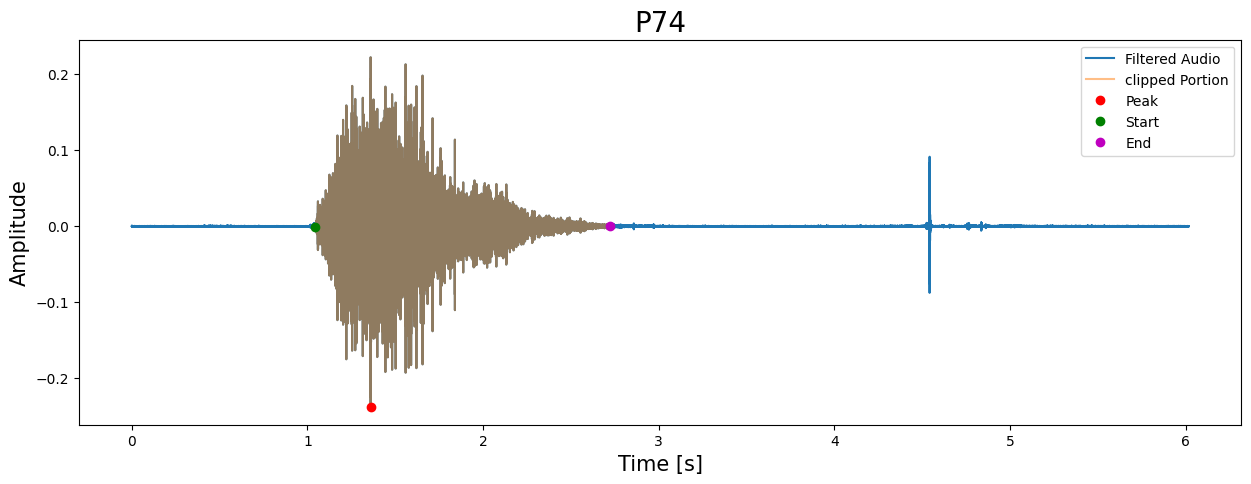

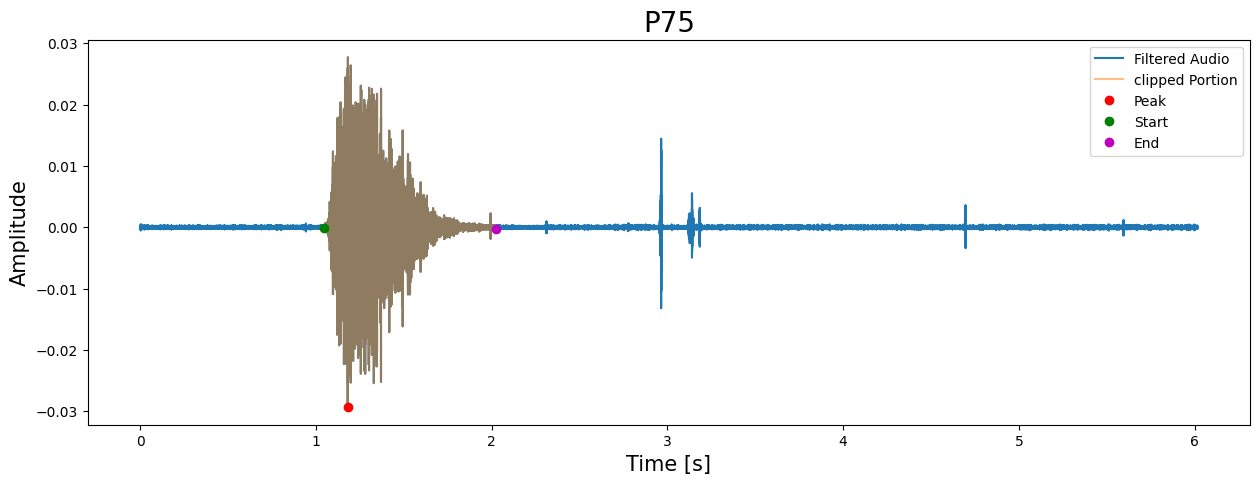

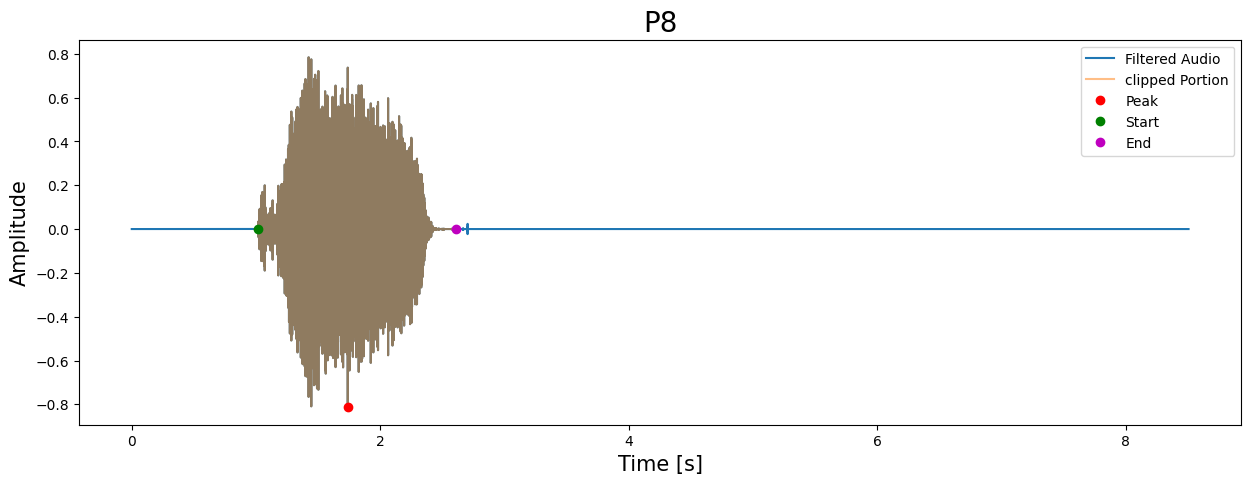

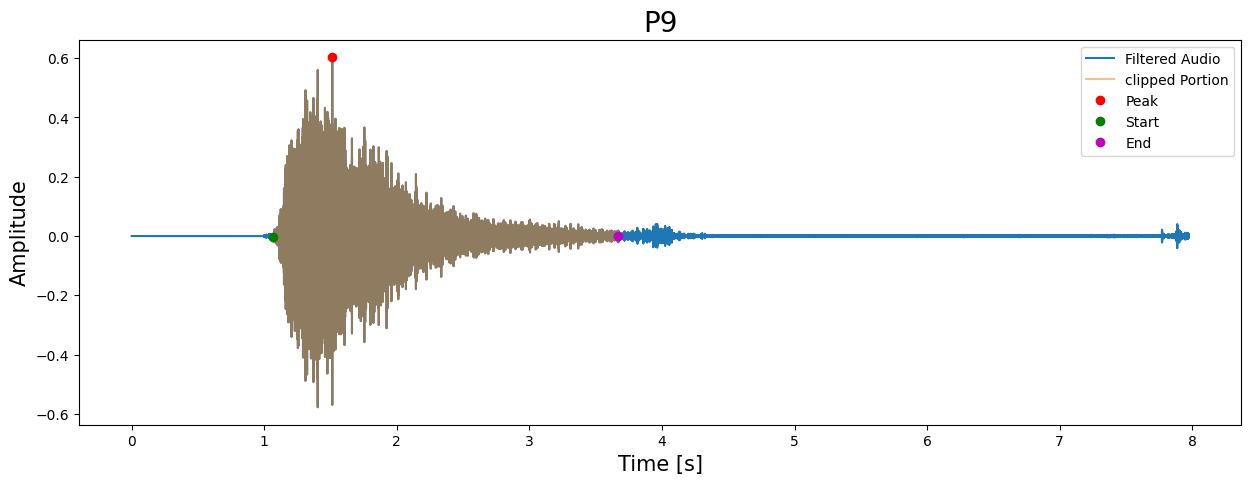

In [15]:
directory = '../2.Data/SpiroMask_Audio_Samples/'    # Path to the folder containing the audio files

cutoff_low = 3000         # desired cutoff frequency of the filter, Hz
cutoff_high = 5000       # desired cutoff frequency of the filter, Hz
order = 10               # desired order of the filter


# Looping through all the files in the directory
for filename in os.listdir(directory):

    # Path to the file
    f = os.path.join(directory, filename)
    
    # checking if it is a file
    if os.path.isfile(f) :

        # Load Audio File
        x , sr = librosa.load(f,sr=16000)

        # Band pass filtering
        x_filt = butter_bandpass_filter(x,cutoff_low,cutoff_high,sr,order)

        # find start, peak and end
        start,peak,end = find_start_peak_end(x_filt)
        t=np.linspace(0,len(x_filt)/sr,len(x_filt))

        # Plotting the Auto-clip signal
        plt.figure(figsize=(15, 5), dpi=100)
        plt.plot(t,x_filt,label='Filtered Audio')
        plt.plot(t[start:end],x_filt[start:end],label='clipped Portion',alpha=0.5)
        plt.plot(t[peak],x_filt[peak],'ro',label='Peak')
        plt.plot(t[start],x_filt[start],'go',label='Start')
        plt.plot(t[end],x_filt[end],'mo',label='End')
        plt.xlabel('Time [s]',fontsize=15)
        plt.ylabel('Amplitude',fontsize=15)
        plt.title(filename.split('.')[0],fontsize=20)
        plt.legend(fontsize=10)
        plt.show()

